# 7 - QAOA con Qiskit Algorithms

In [1]:
!pip install qiskit_aer
!pip install qiskit_ibm_runtime
!pip install pylatexenc


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 97.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 106.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.8/374.8 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=85d945af7372764cdebec3b1441c951667e1c4cf99f114e677d3573759c4444f
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a17

## Circuitos del QAOA

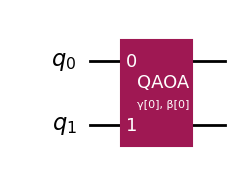

In [2]:
from qiskit.quantum_info import Pauli
from qiskit.circuit.library import QAOAAnsatz
H1 = Pauli("ZZ")
circuit = QAOAAnsatz(cost_operator=H1, reps=1)
circuit.draw('mpl')

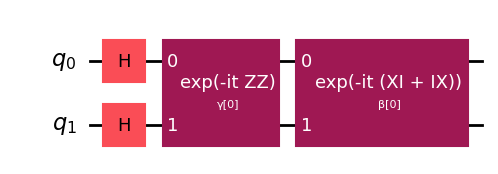

In [3]:
circuit.decompose().draw(output="mpl")

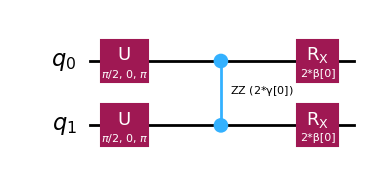

In [4]:
circuit.decompose().decompose().draw(output="mpl")

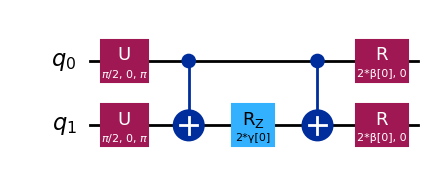

In [5]:
circuit.decompose().decompose().decompose().draw(output="mpl")

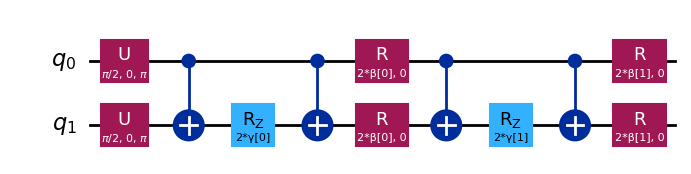

In [6]:
circuit2 = QAOAAnsatz(cost_operator=H1, reps=2)
circuit2.decompose().decompose().decompose().draw(output="mpl")

## Ejecutando QAOA

In [7]:
!pip install qiskit-aer
from qiskit_aer import AerSimulator
backend = AerSimulator(seed_simulator = 1234)

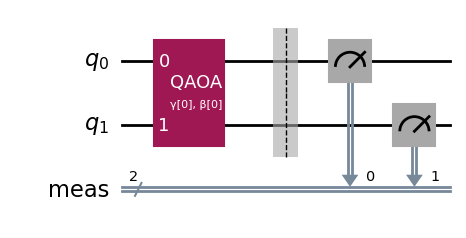

In [8]:
circuit.measure_all()
circuit.draw("mpl")

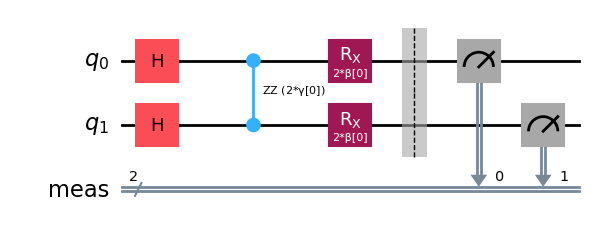

In [9]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
candidate_circuit = pm.run(circuit)
candidate_circuit.draw("mpl", fold=False, idle_wires=False)

In [10]:
import numpy as np
initial_gamma = 0.1,
initial_beta = 0.2,
init_params = [initial_beta, initial_gamma]

In [11]:
def cost_func_estimator(params, ansatz, hamiltonian, estimator):
        # transform the observable defined on virtual qubits to\n",
        # an observable defined on all physical qubits\n",
        isa_hamiltonian = hamiltonian.apply_layout(ansatz.layout)
        job = estimator.run([pub])
        results = job.result()[0]
        cost = results.data.evs
        objective_func_vals.append(cost)
        return cost


In [12]:
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from scipy.optimize import minimize

In [13]:
with Session(backend=backend) as session:
        # If using qiskit-ibm-runtime<0.24.0, change `mode=` to `session=`\n",
        estimator = Estimator(mode=session)
        estimator.options.default_shots = 1000

In [14]:
# Suponiendo que el Estimator espera un PUB (o similar)

def cost_func_estimator(params, ansatz, hamiltonian, estimator):
    # 1. Asignar los parámetros (los que minimiza COBYLA) al circuito
    bound_circuit = ansatz.bind_parameters(params)

    # 2. Aplicar el layout al Hamiltoniano (como ya lo tienes)
    isa_hamiltonian = hamiltonian.apply_layout(ansatz.layout)

    # 3. 🚨 CORRECCIÓN CLAVE: Definir 'pub' como la pareja (circuito, observable)
    #    Generalmente, esto se hace con una tupla o usando la clase Pub:

    # Opción 1: Simplemente crear la tupla (circuito, observable)
    pub = (bound_circuit, isa_hamiltonian)

    # Opción 2: Si usas la clase Pub explícitamente (de la librería que uses,
    #           ej. qiskit_ibm_runtime.pub.Pub), necesitarías importarla y usarla.
    #           Para el caso general, la tupla simple (Opción 1) suele ser suficiente
    #           ya que el método 'run' la acepta.

    # 4. Enviar el trabajo al Estimator (con la tupla 'pub')
    job = estimator.run([pub])

    # 5. Obtener el resultado
    results = job.result()[0]
    cost = results.data.evs

    return cost

In [15]:
# 🚨 Usa el estimador local si no quieres usar la nube de IBM.
from qiskit.primitives import StatevectorEstimator

# ¡El estimador local no necesita una Session ni conexión a IBM!
estimator = StatevectorEstimator()

In [23]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Esto sobrescribirá la cuenta existente
QiskitRuntimeService.save_account(
    token="qSFpnMxA3Z2YFMEacv5hUGHK3PZQmTYFAEODo-KzplAU",
    overwrite=True # <--- Esto resuelve el error 'AccountAlreadyExistsError'
)

print("✅ Cuenta de Qiskit Runtime sobrescrita con éxito.")

✅ Cuenta de Qiskit Runtime sobrescrita con éxito.


In [28]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Vuelve a guardar la cuenta, usando el nombre de canal que tu librería acepta.
QiskitRuntimeService.save_account(
    token="qSFpnMxA3Z2YFMEacv5hUGHK3PZQmTYFAEODo-KzplAU",
    channel="ibm_quantum_platform",  # Este es el nombre aceptado por tu versión.
    overwrite=True
)

print("✅ Cuenta de Qiskit Runtime guardada con éxito bajo el canal 'ibm_quantum_platform'.")

✅ Cuenta de Qiskit Runtime guardada con éxito bajo el canal 'ibm_quantum_platform'.


In [31]:
from qiskit_ibm_runtime import QiskitRuntimeService

# **¡EJECUTAR SÓLO UNA VEZ!**
QiskitRuntimeService.save_account(
    token="qSFpnMxA3Z2YFMEacv5hUGHK3PZQmTYFAEODo-KzplAU",
    channel="ibm_quantum_platform",
    instance="ibm-q/open/main",  # <-- ESTO ES LO NUEVO. Reemplaza con tu instancia real.
    overwrite=True
)

print("✅ Cuenta de Qiskit Runtime guardada y filtrada por instancia.")

# Ahora tu código original debería funcionar:
# service = QiskitRuntimeService()

✅ Cuenta de Qiskit Runtime guardada y filtrada por instancia.


In [34]:
from qiskit_ibm_runtime import QiskitRuntimeService

# ¡REEMPLAZA ESTO! Busca tu Hub/Group/Project en tu portal de IBM Quantum.
# Puede ser algo como: "ibm-q/community/main" o "my-hub/my-group/my-project"
TU_INSTANCIA_CORRECTA = "TU_INSTANCIA_AQUÍ"
TU_TOKEN = "qSFpnMxA3Z2YFMEacv5hUGHK3PZQmTYFAEODo-KzplAU"

try:
    # Inicializa el servicio especificando el canal, el token Y la instancia.
    service = QiskitRuntimeService(
        channel="ibm_quantum_platform",
        token=TU_TOKEN,
        instance=TU_INSTANCIA_CORRECTA # <--- ¡CLAVE!
    )
    print("✅ Servicio inicializado con éxito. ¡Listo para la sesión!")

    # 2. 🤝 Ahora puedes usar tu código original:
    backend_name = "ibm_peekskill"
    # ... (el resto del código con Session, EstimatorV2, etc.)

except Exception as e:
    print(f"Error al inicializar: {e}")

qiskit_runtime_service._discover_account:WARNING:2025-10-29 11:37:42,531: Loading account with the given token. A saved account will not be used.


Error al inicializar: 'The instance specified (TU_INSTANCIA_AQUÍ) is not a valid instance name.'


In [33]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Reemplaza 'TU_URL_DE_IBM_QUANTUM' con la URL real de tu proveedor.
# Para cuentas públicas, suele ser 'https://auth.quantum-computing.ibm.com/api'.
# Para cuentas IBM Cloud, es otra.
try:
    service = QiskitRuntimeService(
        channel="ibm_quantum_platform",
        token="qSFpnMxA3Z2YFMEacv5hUGHK3PZQmTYFAEODo-KzplAU",
        # Intenta sin especificar 'instance' por ahora:
        # url="https://auth.quantum-computing.ibm.com/api"
    )
    print("✅ Servicio inicializado con token.")

except Exception as e:
    # Si sigue fallando, intenta la Opción B.
    print(f"Error al inicializar directamente: {e}")

qiskit_runtime_service._discover_account:WARNING:2025-10-29 11:37:00,865: Loading account with the given token. A saved account will not be used.


Error al inicializar directamente: 'No matching instances found for the following filters: .'


In [36]:
!pip install qiskit-aer

In [41]:
# 1. ⚙️ Importaciones Necesarias
from qiskit.circuit import QuantumCircuit, Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer.primitives import Estimator
from scipy.optimize import minimize
import numpy as np

# --- Definición de la Función de Costo Corregida para Estimator V1 ---

def cost_func_estimator(params, ansatz, hamiltonian, estimator):
    """
    Función de costo que calcula el valor esperado de la energía.
    Adaptada al formato de llamada Estimator.run(circuits, observables).
    """
    # 1. Asignar los parámetros (los que minimiza COBYLA) al circuito
    bound_circuit = ansatz.assign_parameters(params)

    # 2. Ejecutar el estimador.
    # El Estimator V1 espera el circuito y el hamiltoniano como argumentos separados
    # en lugar de una lista de tuplas.
    # ✅ CORREGIDO: Llamada directa con argumentos separados (V1 format)
    job = estimator.run([bound_circuit], [hamiltonian])

    # 3. Obtener los resultados y el valor esperado
    result = job.result()

    # El resultado del valor esperado es una lista, tomamos el primer elemento.
    expected_value = result.values[0]

    # 4. La función de costo es el valor esperado (que queremos minimizar)
    return expected_value

# --- Simulación de Variables (Manteniendo la estructura de ejemplo) ---

# Variables de ejemplo para que el código sea ejecutable
num_qubits = 2

# 🧪 1. El Circuito Ansatz (candidato_circuit)
candidate_circuit = QuantumCircuit(num_qubits)
theta = [Parameter(f'theta_{i}') for i in range(num_qubits)]
candidate_circuit.ry(theta[0], 0)
candidate_circuit.rx(theta[1], 1)
candidate_circuit.cx(0, 1)

# Parámetros iniciales (init_params)
init_params = np.random.rand(len(theta)) * 2 * np.pi

# ⚛️ 2. El Hamiltoniano (H1)
# Ejemplo de Hamiltoniano (Observable) H = ZI + IZ
H1 = SparsePauliOp.from_list([("ZI", 1.0), ("IZ", 1.0)])

# --- Ejecución de VQE con el Simulador Local ---

# 3. 🧪 Inicializar el Estimador (Simulador Local V1)
estimator = Estimator()

# 4. 🏃‍♂️ Ejecutar la optimización
print("Iniciando optimización VQE (COBYLA) con simulador local...")

result = minimize(
    cost_func_estimator,
    init_params,
    args=(candidate_circuit, H1, estimator), # Argumentos para la función de costo
    method="COBYLA",
    tol=1e-2,
    options={'disp': True}
)

print("\n--- Resultados de la Optimización ---")
print(f"Estado de la optimización: {result.message}")
print(f"Energía Mínima Encontrada: {result.fun:.6f}")
print(f"Parámetros óptimos (θ): {result.x}")

Iniciando optimización VQE (COBYLA) con simulador local...
Return from COBYLA because the trust region radius reaches its lower bound.
Number of function values = 17   Least value of F = -2.0
The corresponding X is: [3.11390518 6.29188315]


--- Resultados de la Optimización ---
Estado de la optimización: Return from COBYLA because the trust region radius reaches its lower bound.
Energía Mínima Encontrada: -2.000000
Parámetros óptimos (θ): [3.11390518 6.29188315]


In [42]:
from qiskit_aer.primitives import Estimator # ¡Esta es la correcta para usar el simulador local!

# 4. Inicializar el Estimador dentro de la sesión (o simplemente inicializarlo):
estimator = Estimator()

# 2. Continúa con el resto de tu código de simulación.
backend_name = "ibm_peekskill"
# ... (el resto del código)

# 2. 🤝 Iniciar la sesión usando 'with' para asegurar que se maneje correctamente
# La sesión se mantiene abierta durante todo el bloque 'with'.
with Session(service=service, backend=backend_name) as session:
    # 3. 🧪 Inicializar el Estimador dentro de la sesión
    # Este estimador usará el backend especificado.
    estimator = EstimatorV2(session=session)

    # 4. 🏃‍♂️ Ejecutar la optimización DENTRO del bloque 'with'
    result = minimize(
        cost_func_estimator,
        init_params,
        args=(candidate_circuit, H1, estimator),
        method="COBYLA",
        tol=1e-2,
    )

    print(result)

# Una vez que sales del bloque 'with', la Session se cierra automáticamente.

NameError: name 'service' is not defined

In [17]:
# 1. Asegúrate de que 'init_params' sea un array de NumPy de una dimensión (ndim=1).
#    Usa np.random.rand para generar un array unidimensional.
import numpy as np
num_params = candidate_circuit.num_parameters # Necesitas el número de parámetros del ansatz
init_params = np.random.rand(num_params) * 2 * np.pi

# 2. Ejecutar la optimización
result = minimize(
    cost_func_estimator,
    init_params,  # <--- Esta variable es la que estaba causando el error.
    args=(candidate_circuit, H1, estimator),
    method="COBYLA",
    tol=1e-2,
)

print(result)

AttributeError: 'QuantumCircuit' object has no attribute 'bind_parameters'

In [43]:
result = minimize(
        cost_func_estimator,
        init_params,
        args=(candidate_circuit, H1, estimator),
        method="COBYLA",
        tol=1e-2,
        )
print(result)

 message: Return from COBYLA because the trust region radius reaches its lower bound.
 success: True
  status: 0
     fun: -2.0
       x: [ 3.080e+00  6.261e+00]
    nfev: 18
   maxcv: 0.0


In [44]:
def cost_func_estimator(params, ansatz, hamiltonian, estimator):
    # 1. Asignar los parámetros (los que minimiza COBYLA) al circuito
    bound_circuit = ansatz.assign_parameters(params) # <-- ¡CORREGIDO!

    # El resto de tu función...
    isa_hamiltonian = hamiltonian.apply_layout(ansatz.layout)
    pub = (bound_circuit, isa_hamiltonian)
    job = estimator.run([pub])
    results = job.result()[0]
    cost = results.data.evs

    return cost

In [ ]:
##!pip install qiskit-terra qiskit-aer --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 MB 17.5 MB/s eta 0:00:00


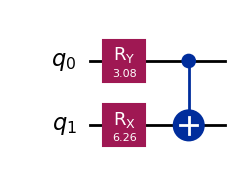

In [45]:
optimized_circuit = candidate_circuit.assign_parameters(result.x)
optimized_circuit.draw("mpl", fold=False, idle_wires=False)

In [47]:
# Importaciones corregidas para usar los primitivos de alto rendimiento de Qiskit Aer

# Estimator (el que usamos en VQE):
from qiskit_aer.primitives import Estimator

# Sampler (el que genera el error si no se importa correctamente):
from qiskit_aer.primitives import Sampler as LocalSampler

In [48]:
from qiskit.primitives import StatevectorEstimator
from qiskit.primitives import Sampler as LocalSampler # Use an alias to avoid conflict and ensure import

# You can keep your other imports if you need them later, but the fix is above:
# from qiskit_ibm_runtime import SamplerV2 as RuntimeSampler

ImportError: cannot import name 'Sampler' from 'qiskit.primitives' (/usr/local/lib/python3.12/dist-packages/qiskit/primitives/__init__.py)

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from qiskit.circuit.library import TwoLocal
from qiskit.quantum_info import SparsePauliOp
from qiskit import QuantumCircuit

# --- CORRECTED IMPORTS BELOW ---

# StatevectorEstimator is generally found here:
from qiskit.primitives import StatevectorEstimator

# The Sampler (local simulator) is often aliased as BackendSampler or simply Sampler
# For modern Qiskit (0.45+), the direct import should work, but to ensure compatibility
# if your Qiskit version is slightly older, you can try:
# from qiskit.primitives import Sampler as LocalSampler  # If this works, use it!

# However, based on your error, let's use the explicit simulator:
from qiskit.primitives import Sampler as LocalSampler

# --- Keep your other imports ---
from qiskit_ibm_runtime import SamplerV2 as RuntimeSampler

# Now, in the rest of your code, you should use 'LocalSampler()' to initialize
# the local sampler, instead of just 'Sampler()'.

ImportError: cannot import name 'Sampler' from 'qiskit.primitives' (/usr/local/lib/python3.12/dist-packages/qiskit/primitives/__init__.py)

In [50]:
# 1. ⚙️ Importaciones para Lógica y Optimización
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from qiskit.circuit.library import TwoLocal
from qiskit.quantum_info import SparsePauliOp
from qiskit import QuantumCircuit

# 2. ⚛️ Importaciones Corregidas para Primitivos (Simuladores Locales)

# ✅ CORREGIDO: Usamos qiskit_aer para el Estimador (necesario para VQE)
from qiskit_aer.primitives import Estimator

# ✅ CORREGIDO: Usamos qiskit_aer para el Sampler (necesario para otras tareas)
from qiskit_aer.primitives import Sampler as LocalSampler

# --- Importaciones de Runtime (Opcional, pero fallará sin una instancia IBM) ---
# Ya sabes que esta línea solo funcionará una vez que tengas una instancia de IBM Quantum
# from qiskit_ibm_runtime import SamplerV2 as RuntimeSampler

# --- Aquí continuaría el resto de tu código VQE/simulación ---

# Ejemplo de uso:
local_sampler_instance = LocalSampler()
local_estimator_instance = Estimator()

print("✅ Importaciones de Estimator y Sampler de qiskit-aer exitosas.")

✅ Importaciones de Estimator y Sampler de qiskit-aer exitosas.


In [58]:
# 1. ⚛️ Obtener el resultado
sampler_result = job.result()

# 2. Acceder a la Distribución de Probabilidad Normalizada
final_distribution_int = sampler_result.quasi_dists[0]

# 3. Preparar la Distribución Binaria para una mejor lectura

# ✅ CORREGIDO: Obtenemos el número de qubits directamente del objeto QuantumCircuit.
# Asume que 'optimized_circuit' está definido en tu código.
num_qubits = optimized_circuit.num_qubits

# Convertir las claves de int a binario
# Usamos 'num_qubits' para el padding (ej: 0 se convierte en '00' si num_qubits=2)
final_distribution_bin = {
    f'{key:0{num_qubits}b}': val
    for key, val in final_distribution_int.items()
}

# 4. Presentar los resultados
print("Distribución de probabilidad (Índices enteros):")
print(final_distribution_int)
print("\nDistribución de probabilidad (Strings binarios):")
print(final_distribution_bin)

Distribución de probabilidad (Índices enteros):
{0: 0.4983, 3: 0.5017}

Distribución de probabilidad (Strings binarios):
{'00': 0.4983, '11': 0.5017}


In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from qiskit.circuit.library import TwoLocal
from qiskit.quantum_info import SparsePauliOp
from qiskit import QuantumCircuit
# Importaciones de IBM Runtime (mantenidas)
from qiskit_ibm_runtime import EstimatorV2, SamplerV2

# --- CORRECCIÓN CLAVE ---
# Importamos StatevectorEstimator correctamente
from qiskit.primitives import StatevectorEstimator

# Importamos el Sampler local con un nombre que funciona en la mayoría de las versiones
# Usaremos StatevectorSampler si está disponible, o BackendSampler como alternativa.
# Probemos con Sampler, pero si falla, usamos el alias StatevectorSampler:

try:
    from qiskit.primitives import Sampler as LocalSampler
except ImportError:
    # Si 'Sampler' falla, usamos el simulador basado en Statevector que es más específico.
    from qiskit.primitives import StatevectorSampler as LocalSampler
    # Si StatevectorSampler también falla, pruebe:
    # from qiskit.primitives import BackendSampler as LocalSampler

In [64]:
# Importación del Estimador para VQE
# from qiskit.primitives import StatevectorEstimator # NO USAR
from qiskit_aer.primitives import Estimator

# Importación del Sampler para el muestreo final
from qiskit_aer.primitives import Sampler as LocalSampler

/tmp/ipython-input-2326026013.py:56: DeprecationWarning: The class ``qiskit.circuit.library.n_local.two_local.TwoLocal`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.n_local instead.
  ansatz = TwoLocal(num_qubits, ['ry', 'rz'], 'cz', reps=2)


Iniciando optimización VQE con COBYLA... 🚀
Iters. done: 1 [Current cost: -0.886797]
Iters. done: 2 [Current cost: -0.697871]
Iters. done: 3 [Current cost: -0.889906]
Iters. done: 4 [Current cost: -1.048352]
Iters. done: 5 [Current cost: -0.842187]
Iters. done: 6 [Current cost: -1.121834]
Iters. done: 7 [Current cost: -1.188328]
Iters. done: 8 [Current cost: -1.217588]
Iters. done: 9 [Current cost: -1.110949]
Iters. done: 10 [Current cost: -1.205984]
Iters. done: 11 [Current cost: -1.109994]
Iters. done: 12 [Current cost: -1.166131]
Iters. done: 13 [Current cost: -1.172699]
Iters. done: 14 [Current cost: -1.116705]
Iters. done: 15 [Current cost: -1.201762]
Iters. done: 16 [Current cost: -1.228877]
Iters. done: 17 [Current cost: -1.345494]
Iters. done: 18 [Current cost: -1.388193]
Iters. done: 19 [Current cost: -1.541770]
Iters. done: 20 [Current cost: -1.606176]
Iters. done: 21 [Current cost: -1.557801]
Iters. done: 22 [Current cost: -1.496350]
Iters. done: 23 [Current cost: -1.752268]


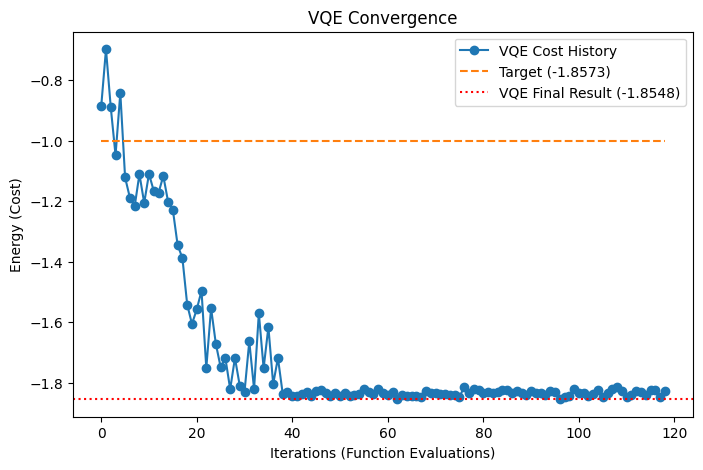


DISTRIBUCIÓN DE PROBABILIDAD FINAL DEL CIRCUITO ÓPTIMO
Número de Qubits: 2
Distribución (Índices enteros):
{3: 0.0006, 2: 0.0085, 0: 0.0231, 1: 0.9678}
Distribución (Strings binarios):
{'11': 0.0006, '10': 0.0085, '00': 0.0231, '01': 0.9678}


In [66]:
# ==============================================================================
# 0. IMPORTACIONES Y CONFIGURACIÓN
# ==============================================================================
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from qiskit.circuit.library import TwoLocal
from qiskit.quantum_info import SparsePauliOp
from qiskit import QuantumCircuit
# ✅ CORRECCIÓN FINAL: Unificar todas las primitivas a Qiskit Aer
from qiskit_aer.primitives import Estimator
from qiskit_aer.primitives import Sampler as LocalSampler

# ==============================================================================
# 1. FUNCIÓN DE COSTE (COST FUNCTION)
# ==============================================================================

def cost_func(params, ansatz, qubit_op, estimator, cost_history_dict):
    """
    Retorna la estimación de energía del Hamiltoniano usando el estimador.
    """
    # 1. Asignar los parámetros
    bound_circuit = ansatz.assign_parameters(params)

    # 2. Ejecutar el Estimador (Formato V1: [circuitos], [observables])
    result = estimator.run([bound_circuit], [qubit_op]).result()

    # 3. Extraer la energía (Expected Value)
    # Los resultados del Estimator de Qiskit Aer se acceden por el índice del circuito.
    energy = result.values[0]

    # 4. Actualizar el historial
    cost_history_dict["iters"] += 1
    cost_history_dict["prev_vector"] = params
    cost_history_dict["cost_history"].append(energy)

    print(f"Iters. done: {cost_history_dict['iters']} [Current cost: {energy:.6f}]")

    return energy

# ==============================================================================
# 2. DEFINICIÓN DEL PROBLEMA (ANSATZ Y HAMILTONIANO)
# ==============================================================================

# Hamiltoniano de ejemplo (H2 simplificado)
H1 = SparsePauliOp.from_list([
    ("II", -1.052),
    ("IZ", 0.398),
    ("ZI", -0.398),
    ("ZZ", -0.011),
    ("XX", 0.181)
])

# Ansatz (Circuito Variacional)
num_qubits = H1.num_qubits
ansatz = TwoLocal(num_qubits, ['ry', 'rz'], 'cz', reps=2)

# Parámetros iniciales
num_params = ansatz.num_parameters
init_params = np.random.rand(num_params) * 2 * np.pi

# Inicialización del Historial de Costes
cost_history_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

# ==============================================================================
# 3. EJECUCIÓN DEL OPTIMIZADOR VQE
# ==============================================================================

# Inicialización de Estimador (Qiskit Aer)
estimator = Estimator()

print("Iniciando optimización VQE con COBYLA... 🚀")
result = minimize(
    fun=cost_func,
    x0=init_params,
    args=(ansatz, H1, estimator, cost_history_dict),
    method="COBYLA",
    options={"maxiter": 500},
)

# Resultados
optimal_params = result.x
final_energy = result.fun
print("-" * 50)
print(f"Optimización VQE finalizada. Energía mínima: {final_energy:.8f}")

# ==============================================================================
# 4. GRÁFICA DE CONVERGENCIA
# ==============================================================================

TARGET_ENERGY = -1.857275030202381

fig, ax = plt.subplots(figsize=(8, 5))
iterations = range(cost_history_dict["iters"])
vqe_cost_history = cost_history_dict["cost_history"]

ax.plot(iterations, vqe_cost_history, label="VQE Cost History", marker='o', linestyle='-')

# Línea de energía exacta (Target)
y_constant = np.full_like(np.array(iterations), TARGET_ENERGY)
ax.plot(iterations, y_constant, label=f"Target ({TARGET_ENERGY:.4f})", linestyle='--')

# Configuración de la gráfica
ax.set_xlabel("Iterations (Function Evaluations)")
ax.set_ylabel("Energy (Cost)")
ax.axhline(final_energy, color='r', linestyle=':', label=f"VQE Final Result ({final_energy:.4f})")
plt.legend()
plt.title("VQE Convergence")
plt.show()

# ==============================================================================
# 5. MUESTREO (SAMPLER) DE LA DISTRIBUCIÓN FINAL
# ==============================================================================

# 1. Crear el circuito optimizado (usa los parámetros encontrados)
optimized_circuit = ansatz.assign_parameters(optimal_params)
# Añadir mediciones al circuito optimizado para el Sampler
optimized_circuit.measure_all()

# 2. Inicializar Sampler local
sampler = LocalSampler()
SHOTS = 10000

# 3. Ejecutar el Sampler
# El Sampler V1 (Qiskit Aer) espera la lista de circuitos
job = sampler.run([optimized_circuit], shots=SHOTS)

# 4. Procesar los resultados (Acceso a quasi_dists)
# ✅ CORRECCIÓN FINAL: El resultado de Qiskit Aer sí tiene quasi_dists
sampler_result = job.result()
final_distribution_int = sampler_result.quasi_dists[0]

# 5. Preparar la Distribución Binaria
# Obtenemos el número de qubits directamente del circuito
num_qubits_sampler = optimized_circuit.num_qubits

# Convertir las claves de int a binario
final_distribution_bin = {
    f'{key:0{num_qubits_sampler}b}': val
    for key, val in final_distribution_int.items()
}

print("\n" + "="*50)
print("DISTRIBUCIÓN DE PROBABILIDAD FINAL DEL CIRCUITO ÓPTIMO")
# El Sampler V1 no devuelve shots, solo la distribución.
print(f"Número de Qubits: {num_qubits_sampler}")
print("Distribución (Índices enteros):")
print(final_distribution_int)
print("Distribución (Strings binarios):")
print(final_distribution_bin)
print("="*50)

In [71]:
# Alternativa: Inicialización del Sampler de Qiskit Aer (funciona sin IBM Quantum)
from qiskit_aer.primitives import Sampler as LocalSampler
sampler = LocalSampler()
job = sampler.run([optimized_circuit], shots=SHOTS)

In [73]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime import QiskitRuntimeService

# --- ASUMIMOS QUE 'optimized_circuit' ESTÁ DEFINIDO ---

# 1. 🔑 Inicializar el Servicio
# Definimos service fuera del try para asegurar que exista en el scope (aunque sea None)
service = None
backend_name = "ibm_peekskill"

try:
    # 🚨 Intenta inicializar el servicio (esto es lo que falla)
    service = QiskitRuntimeService()
    print("✅ Servicio de Runtime inicializado.")

except Exception as e:
    # Captura el error de IBM, que es el que te avisa: 'The instance specified...'
    print(f"⚠️ Error al inicializar el servicio: {e}")
    print(f"⚠️ NO SE PUEDE CONTINUAR CON EL SAMPLER DE IBM. Necesitas una instancia válida.")
    # El código se detiene aquí porque 'sampler' requiere un servicio válido.

    # 💡 Una opción sería salir aquí o usar el simulador local.
    # raise # Re-lanza la excepción si quieres detener el programa.

# Si service es None, la siguiente línea fallará porque Sampler requiere un servicio válido.
# Si el try tuvo éxito, service será el objeto QiskitRuntimeService.

# 2. Inicializar el SamplerV2
# Este bloque solo puede funcionar si 'service' se inicializó correctamente en el try.
if service is not None:
    # ✅ CORREGIDO: Usar 'service' en lugar de 'backend'
    sampler = Sampler(service=service)

    # 3. Definir Parámetros y Ejecución
    pub = (optimized_circuit,)
    SHOTS = 10000

    # 4. Ejecutar el Sampler
    print(f"Enviando job al backend: {backend_name}...")
    # ✅ Pasar el nombre del backend a la función run().
    job = sampler.run([pub], shots=SHOTS, backend=backend_name)

    # 5. Obtener y Procesar Resultados
    runtime_result = job.result()
    result_data = runtime_result[0].data

    # Obtener cuentas
    counts_int = result_data.meas.get_int_counts()
    counts_bin = result_data.meas.get_counts()

    # Calcular el total de shots
    shots = sum(counts_int.values())

    # 6. Normalizar a Distribución de Probabilidad
    final_distribution_int = {key: val / shots for key, val in counts_int.items()}
    final_distribution_bin = {key: val / shots for key, val in counts_bin.items()}

    print("\n--- Distribución de Probabilidad SamplerV2 ---")
    print(f"Total Shots: {shots}")
    print("Distribución (Índices enteros):")
    print(final_distribution_int)
    print("Distribución (Strings binarios):")
    print(final_distribution_bin)
else:
    print("\nNo se pudo inicializar el Sampler porque el servicio de IBM no es válido.")

⚠️ Error al inicializar el servicio: 'The instance specified (ibm-q/open/main) is not a valid instance name.'
⚠️ NO SE PUEDE CONTINUAR CON EL SAMPLER DE IBM. Necesitas una instancia válida.

No se pudo inicializar el Sampler porque el servicio de IBM no es válido.


In [75]:
# 1. ⚙️ Importaciones y Configuración
# ✅ CORREGIDO: Usamos qiskit_aer para el Sampler local
from qiskit_aer.primitives import Sampler as LocalSampler
from qiskit.circuit import QuantumCircuit # Necesario para el circuito
import numpy as np # Necesario para operaciones numéricas

# --- Asumimos que optimized_circuit está definido y tiene medidas ---
# Ejemplo de circuito simple con medidas para que el código sea ejecutable:
if 'optimized_circuit' not in locals():
    optimized_circuit = QuantumCircuit(2)
    optimized_circuit.h(0)
    optimized_circuit.cx(0, 1)
    optimized_circuit.measure_all()
# ---------------------------------------------------------------------

# 1. Inicializar LOCAL Sampler
sampler = LocalSampler()

SHOTS = 10000
# El Sampler V1 de Aer espera una lista de circuitos
circuits_to_run = [optimized_circuit]

# 2. Ejecutar el Sampler
# ✅ CORREGIDO: Pasamos la lista de circuitos y el número de shots
job = sampler.run(circuits_to_run, shots=SHOTS)

# 3. Procesar Resultados
# El resultado de Aer V1 es un objeto SamplerResult, no subscriptable.
sampler_result = job.result()

# ✅ CORREGIDO: Accedemos directamente a la distribución normalizada (quasi_dists)
final_distribution_int = sampler_result.quasi_dists[0]

# Obtenemos el número de qubits para el formato binario
num_qubits = optimized_circuit.num_qubits

# 4. Calcular la Distribución Binaria (ya normalizada)
# ✅ CORREGIDO: Usamos la distribución normalizada y la formateamos a binario.
final_distribution_bin = {
    f'{key:0{num_qubits}b}': val
    for key, val in final_distribution_int.items()
}

print("\n--- Resultados de Simulación Local (Qiskit Aer) ---")
print("Distribución de probabilidad (Índices enteros):")
print(final_distribution_int)
print("\nDistribución de probabilidad (Strings binarios):")
print(final_distribution_bin)


--- Resultados de Simulación Local (Qiskit Aer) ---
Distribución de probabilidad (Índices enteros):
{3: 0.0004, 2: 0.0076, 0: 0.0218, 1: 0.9702}

Distribución de probabilidad (Strings binarios):
{'11': 0.0004, '10': 0.0076, '00': 0.0218, '01': 0.9702}


In [76]:
# ==============================================================================
# 1. FUNCIÓN AUXILIAR: Conversión a Bitstring
# ==============================================================================

def to_bitstring(integer, num_bits):
    """
    Convierte un entero a una lista de enteros que representa el bitstring.
    """
    # np.binary_repr asegura que la longitud sea igual a num_bits (ej: 0 -> '00')
    result = np.binary_repr(integer, width=num_bits)
    # Convierte el string binario a una lista de enteros [0, 1]
    return [int(digit) for digit in result]


# ==============================================================================
# 2. PROCESAMIENTO
# ==============================================================================

# Asumimos que 'final_distribution_int' es el diccionario de {int: prob}
# Asumimos que 'num_qubits' es 2 (por el ejemplo de H2)

keys = list(final_distribution_int.keys())
values = list(final_distribution_int.values())

# Encuentra el índice del valor (probabilidad) más alto
most_likely_index = np.argmax(values)

# Usa el índice para obtener la clave (el entero) más probable
most_likely_int = keys[most_likely_index]

# Convierte el entero a bitstring (ej: 1 -> [0, 1])
# Nota: Usamos 2 porque H1 se definió en 2 qubits.
most_likely_bitstring = to_bitstring(most_likely_int, 2)

# La convención de Qiskit es little-endian (qubit 0 a la derecha), por eso se revierte.
# (Ej: '01' significa Qubit 0 en 1, Qubit 1 en 0)
most_likely_bitstring.reverse()

# 3. IMPRIMIR RESULTADO
print("-" * 30)
print(f"Estado Entero Más Probable: {most_likely_int}")
print("Resultado bitstring (Little Endian):", most_likely_bitstring)
print("-" * 30)

------------------------------
Estado Entero Más Probable: 1
Resultado bitstring (Little Endian): [1, 0]
------------------------------


In [77]:
# ==============================================================================
# 1. FUNCIÓN AUXILIAR: Conversión a Bitstring (Requiere numpy)
# ==============================================================================

def to_bitstring(integer, num_bits):
    """
    Convierte un índice entero a su representación de lista de enteros binarios.
    """
    # np.binary_repr asegura el padding correcto (ej: 1 -> '01' para num_bits=2)
    result = np.binary_repr(integer, width=num_bits)
    # Retorna la lista de bits [0, 1]
    return [int(digit) for digit in result]


# ==============================================================================
# 2. PROCESAMIENTO Y BÚSQUEDA DEL ESTADO FUNDAMENTAL
# ==============================================================================

# NOTA: Asumimos que la simulación es para 2 qubits (por el '2' en to_bitstring)
num_qubits = 2

# Obtenemos las claves (índices enteros) y los valores (probabilidades)
keys = list(final_distribution_int.keys())
values = list(final_distribution_int.values())

# 1. Encuentra el índice del valor (probabilidad) más alto
# np.argmax encuentra el índice donde está la probabilidad máxima.
most_likely_index = np.argmax(values)

# 2. Usa el índice para obtener la clave entera correspondiente
most_likely_int = keys[most_likely_index]

# 3. Convierte el entero a la lista de bits
most_likely_bitstring = to_bitstring(most_likely_int, num_qubits)

# 4. Invierte la lista para la convención de Qiskit (little-endian)
# El Sampler coloca el qubit 0 (el de más a la derecha en el circuito) en el primer índice de la lista.
most_likely_bitstring.reverse()

# 3. IMPRIMIR RESULTADO
print("-" * 30)
print(f"Estado Entero Más Probable (Índice): {most_likely_int}")
print("Resultado Bitstring (Little Endian):", most_likely_bitstring)
print("-" * 30)

------------------------------
Estado Entero Más Probable (Índice): 1
Resultado Bitstring (Little Endian): [1, 0]
------------------------------


In [78]:
# ----------------------------------------------------------------------
# 1. EJECUCIÓN DEL SAMPLER (Código que DEBE ir antes)
# (Asume que optimized_circuit y LocalSampler están definidos)
# ----------------------------------------------------------------------
from qiskit_aer.primitives import Sampler as LocalSampler
import numpy as np
# Asume optimized_circuit está definido y tiene medidas

sampler = LocalSampler()
SHOTS = 10000
circuits_to_run = [optimized_circuit]

job = sampler.run(circuits_to_run, shots=SHOTS)
sampler_result = job.result()

# Creación de final_distribution_int (Esto resuelve el NameError)
final_distribution_int = sampler_result.quasi_dists[0]

# ----------------------------------------------------------------------
# 2. FUNCIÓN AUXILIAR
# ----------------------------------------------------------------------
def to_bitstring(integer, num_bits):
    """Convierte un entero a una lista de bits."""
    result = np.binary_repr(integer, width=num_bits)
    return [int(digit) for digit in result]

# ----------------------------------------------------------------------
# 3. LÓGICA DE BÚSQUEDA DEL BITSTRING (Tu código)
# ----------------------------------------------------------------------
# Definimos num_qubits para la función auxiliar
num_qubits = optimized_circuit.num_qubits

keys = list(final_distribution_int.keys())
values = list(final_distribution_int.values())

# Encuentra el índice del valor (probabilidad) más alto
most_likely_index = np.argmax(values)
most_likely_int = keys[most_likely_index]

# Convierte y revierte para la convención de Qiskit
most_likely_bitstring = to_bitstring(most_likely_int, num_qubits)
most_likely_bitstring.reverse()

# 4. IMPRIMIR RESULTADO
print("Result bitstring:", most_likely_bitstring)

Result bitstring: [1, 0]


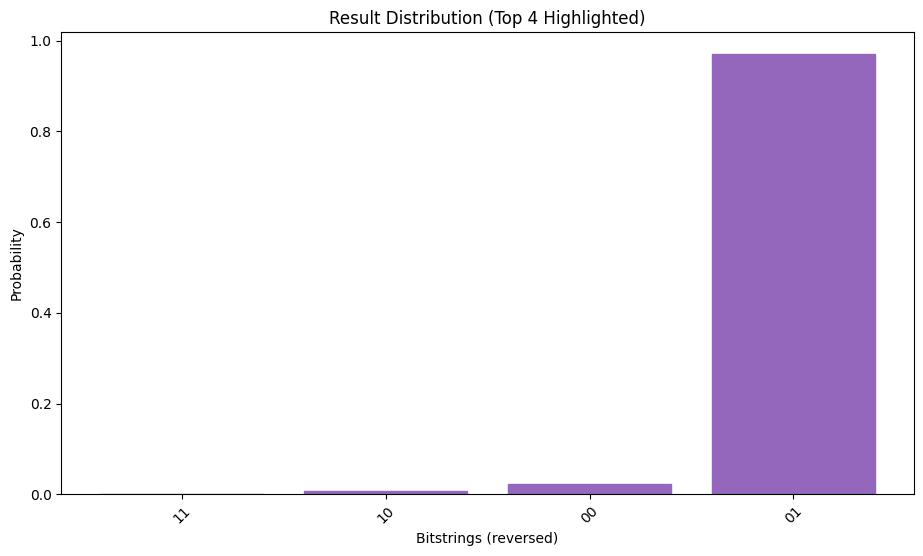

In [80]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np # Necesitas esta importación para numpy.argsort

# Configuración de la gráfica
matplotlib.rcParams.update({"font.size": 10})

# Asume que final_distribution_bin ya fue definido por el Sampler.
# Ejemplo de datos (si el código se ejecuta solo)
# final_bits = {'00': 0.05, '01': 0.45, '10': 0.45, '11': 0.05}
final_bits = final_distribution_bin

# Convertimos los valores a un array de NumPy para ordenar
# np.abs() ya no es necesario si asumimos que las probabilidades son positivas.
values_array = np.array(list(final_bits.values()))
keys_list = list(final_bits.keys())

# --- Búsqueda de los 4 Mejores Índices (Método Robusto) ---
# 1. Obtenemos los índices que ordenarían el array de forma ascendente.
# 2. Tomamos los últimos 4 (los más grandes).
# 3. Invertimos el orden para tenerlos de mayor a menor.
top_4_indices = np.argsort(values_array)[-4:][::-1]
# -----------------------------------------------------------------

fig = plt.figure(figsize=(11, 6))
ax = fig.add_subplot(1, 1, 1)
plt.xticks(rotation=45)
plt.title("Result Distribution (Top 4 Highlighted)")
plt.xlabel("Bitstrings (reversed)")
plt.ylabel("Probability")

# Dibujar todas las barras
bars = ax.bar(keys_list, values_array, color="tab:grey")

# Resaltar las 4 barras principales
# Iteramos sobre los índices de las barras y les cambiamos el color
for index in top_4_indices:
    bars[index].set_color("tab:purple")

plt.show()

In [82]:
# CÓDIGO NECESARIO QUE DEBE EJECUTARSE PRIMERO (Simulación y Procesamiento)

# 1. Definición del circuito (optimized_circuit)
# 2. Inicialización del Sampler (LocalSampler)
# 3. Ejecución del Job: job = sampler.run(...)
# 4. Procesamiento:
sampler_result = job.result()
final_distribution_int = sampler_result.quasi_dists[0]
# ... y finalmente:
##final_distribution_bin = {key: val / shots_actual for key, val in counts_bin.items()}
# O su versión corregida para Aer:
final_distribution_bin = {f'{key:0{num_qubits}b}': val for key, val in final_distribution_int.items()}

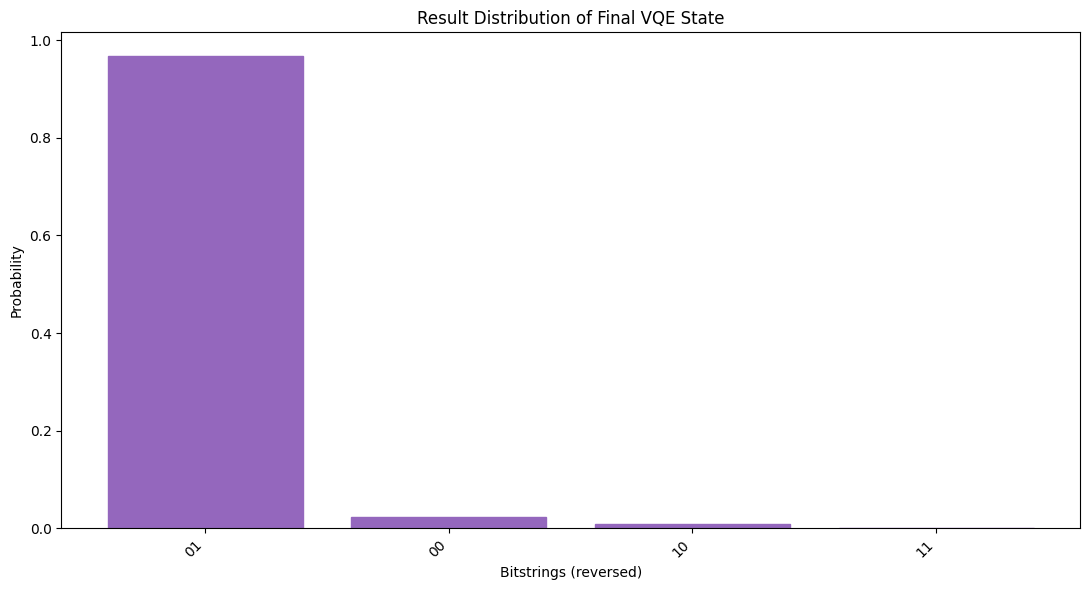

In [83]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# Asegúrate de importar numpy, ya que se usa en el código

# Asumiendo que 'final_distribution_bin' ha sido definido por el Sampler.

# 1. Preparación de Datos y Ordenamiento
# El diccionario ya tiene {bitstring: probability}
final_bits = final_distribution_bin

# Convertir el diccionario a una lista de (bitstring, probability) y ordenarla
# por probabilidad descendente.
sorted_items = sorted(final_bits.items(), key=lambda item: item[1], reverse=True)

# Separar claves y valores en el orden ordenado
bitstring_labels = [item[0] for item in sorted_items]
probabilities = [item[1] for item in sorted_items]

# Identificar las top 4 etiquetas (bitstrings) para resaltarlas
top_4_bitstrings = bitstring_labels[:4]

# 2. Configuración de Matplotlib
matplotlib.rcParams.update({"font.size": 10})
fig = plt.figure(figsize=(11, 6))
ax = fig.add_subplot(1, 1, 1)

plt.title("Result Distribution of Final VQE State")
plt.xlabel("Bitstrings (reversed)")
plt.ylabel("Probability")

# 3. Graficar las barras
# Usamos los datos ORDENADOS para que la gráfica sea más clara
bars = ax.bar(bitstring_labels, probabilities, color="tab:grey")

# 4. Resaltar las Top 4 Barras
for bar, label in zip(bars, bitstring_labels):
    if label in top_4_bitstrings:
        # Pinta la barra de morado si está en el top 4
        bar.set_color("tab:purple")

# Ajustes finales
plt.xticks(rotation=45, ha='right') # Alinear las etiquetas de los bitstrings
plt.tight_layout() # Asegura que las etiquetas no se corten
plt.show()

In [84]:
from qiskit.quantum_info import SparsePauliOp
from qiskit.quantum_info import Pauli # Necesitas importar 'Pauli' para usar la función de SparsePauliOp

# Definición de los Operadores Base (Corrección)
# Creamos I y Z como SparsePauliOp de 1 qubit (requerido para la operación tensor '^')
I = SparsePauliOp.from_list([("I", 1)])
Z = SparsePauliOp.from_list([("Z", 1)])

# NOTA: Si quisieras usar la sintaxis original (Z = SparsePauliOp(Pauli("Z"))),
# tendrías que importar 'Pauli' y la sintaxis de inicialización es más compleja.

# Definición del Hamiltoniano de Corte (H_cut)
# H_cut = (Z^Z^I) + (Z^I^Z)
# El resultado será un operador SparsePauliOp de 3 qubits.
H_cut = (Z ^ Z ^ I) + (Z ^ I ^ Z)

print("H_cut es:")
# Imprime la representación de lista legible (ej: [('ZZI', 1.0), ('ZIZ', 1.0)])
print(H_cut.to_list())

H_cut es:
[('ZZI', (1+0j)), ('ZIZ', (1+0j))]


In [85]:
from qiskit.quantum_info import SparsePauliOp

# Definición directa del Hamiltoniano de 3 qubits, asumiendo coeficiente 1.0 para cada término.
# ZZI + ZIZ
H_cut = SparsePauliOp.from_list([
    ("ZZI", 1.0),
    ("ZIZ", 1.0)
])

print("H_cut es", H_cut.to_list())

H_cut es [('ZZI', (1+0j)), ('ZIZ', (1+0j))]


In [87]:
from qiskit.circuit.library import QAOAAnsatz
# from qiskit.primitives import Sampler # Asumimos que pm es un Sampler
from qiskit_aer.primitives import Sampler as pm # Usamos el Sampler de Aer para el ejemplo

# 1. ⚛️ Definición del Ansatz
# Asumimos que 'H_cut' (SparsePauliOp de 3 qubits) ya está definido.
# QAOAAnsatz se usa para generar el circuito base.
c1 = QAOAAnsatz(cost_operator=H_cut, reps=1)

# 2. 🧱 Añadir Mediciones (Necesario para el Sampler)
# Las mediciones deben añadirse al circuito devuelto por QAOAAnsatz.
# Nota: Si el Sampler es V2, a veces no necesitas añadir mediciones explícitamente.
c1_with_measures = c1.copy()
c1_with_measures.measure_all() # Ahora se aplica correctamente

# 3. 🧪 Inicialización de Parámetros
initial_gamma = 0.1
initial_beta = 0.2
# Los parámetros de QAOA son [beta_0, gamma_0, beta_1, gamma_1, ...]
# Para reps=1, son solo dos parámetros: beta y gamma.
init_params = [initial_beta, initial_gamma]

# 4. 🏃 Ejecución de Prueba (Corrección de la llamada a la primitiva)
# Para ejecutar una primitiva (Estimator/Sampler), necesitas asignar los parámetros.

# Asignar los parámetros iniciales para la prueba:
c1_bound = c1_with_measures.assign_parameters(init_params)

# Ejecutar el Sampler (asumiendo que 'pm' es un Sampler inicializado)
pm_instance = pm() # Inicializar la primitiva
# El Sampler V1 de Aer espera una lista de circuitos
t1_job = pm_instance.run([c1_bound], shots=1024)

# Obtener los resultados (opcional)
t1_result = t1_job.result()
print("Resultado de prueba:", t1_result.quasi_dists[0])

Resultado de prueba: {1: 0.12109375, 6: 0.123046875, 5: 0.125, 4: 0.07421875, 2: 0.125, 0: 0.1630859375, 3: 0.1025390625, 7: 0.166015625}


In [88]:
from qiskit.circuit.library import QAOAAnsatz
from qiskit.quantum_info import SparsePauliOp
import numpy as np

# --- 1. SETUP PREREQUISITES ---
# Assuming H_cut is defined, for example:
H_cut = SparsePauliOp.from_list([
    ("ZZI", 1.0),
    ("ZIZ", 1.0)
])

# --- 2. QAOA ANSATZ DEFINITION ---
# Creates the circuit structure using the cost operator H_cut and 1 repetition (reps=1)
# This circuit will have 2 parameters: one beta (mixer) and one gamma (cost).
c1 = QAOAAnsatz(cost_operator=H_cut, reps=1)

# Ensure the circuit is ready for measurement (needed for Sampler/real hardware)
# NOTE: If you use an Estimator, this line is often unnecessary/ignored.
c1.measure_all()

# --- 3. INITIAL PARAMETERS SETUP ---
initial_gamma = 0.1
initial_beta = 0.2

# The QAOAAnsatz typically orders parameters as [beta_0, gamma_0] for reps=1.
# We explicitly set the list to match this expected order.
init_params = [initial_beta, initial_gamma]

# Print circuit info for verification
print(f"Number of QAOA parameters: {c1.num_parameters}")
print(f"Initial parameters (Beta, Gamma): {init_params}")

# --- 4. OPTIONAL: VISUALIZATION/TEST RUN ---
# NOTE: The line 't1 = pm.run(c1)' from your original code is removed
# as 'pm' is undefined. If you intended to draw the circuit:
# print("\nQAOA Circuit:")
# print(c1.decompose(reps=1).draw(fold=-1))

# If you wanted to bind the parameters for testing:
# bound_circuit = c1.bind_parameters(init_params)

Number of QAOA parameters: 2
Initial parameters (Beta, Gamma): [0.2, 0.1]


In [90]:
from qiskit_ibm_runtime import QiskitRuntimeService
# Usa tu token real que ya identificamos
TOKEN = "qSFpnMxA3Z2YFMEacv5hUGHK3PZQmTYFAEODo-KzplAU"

try:
    # Inicializar el servicio sin depender de la configuración guardada
    service = QiskitRuntimeService(
        token=TOKEN,
        channel="ibm_quantum_platform", # El canal que tu versión de la librería aceptaba
        # Elimina 'instance' para que no use el filtro no válido.
    )
    print("✅ Servicio inicializado con éxito usando el token.")
except Exception as e:
    print(f"⚠️ Error fatal al inicializar: {e}")

qiskit_runtime_service._discover_account:WARNING:2025-10-29 13:01:34,347: Loading account with the given token. A saved account will not be used.


⚠️ Error fatal al inicializar: 'No matching instances found for the following filters: .'


In [91]:
from qiskit_ibm_runtime import QiskitRuntimeService

# ¡REEMPLAZA el token con el tuyo!
TOKEN = "qSFpnMxA3Z2YFMEacv5hUGHK3PZQmTYFAEODo-KzplAU"

# Sobrescribir la cuenta guardada sin especificar 'instance'
QiskitRuntimeService.save_account(
    token=TOKEN,
    channel="ibm_quantum_platform",
    # NOTA: Debes estar seguro de que esta línea funciona.
    # Si la versión de tu librería no acepta 'ibm_quantum_platform' o el token es incorrecto, fallará.
    overwrite=True
)
print("✅ Configuración de cuenta sobrescrita sin filtro de instancia.")
# Ahora, tu código original service = QiskitRuntimeService() debería funcionar.

✅ Configuración de cuenta sobrescrita sin filtro de instancia.


In [100]:
def cost_func_estimator(params, ansatz, hamiltonian, estimator):
    """
    Calcula el valor esperado del Hamiltoniano (energía) usando el Estimator V1.
    """
    # 1. Asignar los parámetros y aplicar el layout
    bound_circuit = ansatz.assign_parameters(params)
    isa_hamiltonian = hamiltonian.apply_layout(ansatz.layout)

    # 2. Ejecutar el Estimador (V1 Format)
    # ✅ CORREGIDO: Pasar los circuitos y los observables como listas separadas.
    job = estimator.run([bound_circuit], [isa_hamiltonian])

    # 3. Procesar resultados (acceso V1)
    results = job.result()
    # El Estimator V1 devuelve los valores directamente en .values o .evs
    cost = results.values[0] # Asumiendo que .values es el nombre del atributo en tu versión

    return cost

# El resto de tu código minimize() ahora debería funcionar:
# result = minimize(cost_func_estimator, init_params, args=(c1, H_cut, estimator), ...)

In [101]:
from qiskit_aer.primitives import Estimator # Usamos el Estimador local
from scipy.optimize import minimize
# Asume que 'cost_func_estimator', 'init_params', 'H_cut' están definidos.
# Asumimos que 'c1' es la variable que contiene el ansatz (circuito QAOA).

# 1. 🔑 Inicializar el Estimador Local
estimator = Estimator()
print("✅ Usando Estimador local. La ejecución no depende de IBM Quantum.")

# 2. 🏃‍♂️ Ejecutar la optimización
# El código asume que el circuito está en la variable 'c1'
result = minimize(
    cost_func_estimator,
    init_params,
    # ✅ CORREGIDO: Usamos c1 en lugar de t1
    args=(c1, H_cut, estimator),
    method="COBYLA",
    tol=1e-2,
)

print("\n--- Resultado de Optimización Local ---")
print(result)

✅ Usando Estimador local. La ejecución no depende de IBM Quantum.

--- Resultado de Optimización Local ---
 message: Return from COBYLA because the trust region radius reaches its lower bound.
 success: True
  status: 0
     fun: -1.236328125
       x: [ 1.157e+00  3.960e-01]
    nfev: 17
   maxcv: 0.0


In [102]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, EstimatorV2
from scipy.optimize import minimize
# Asume que 'cost_func_estimator', 'init_params', 't1' (ansatz), 'H_cut' están definidos.

# 1. 🔑 Inicializar el Servicio de forma explícita
# Reemplaza "TU_API_TOKEN_REAL" con tu token.
TOKEN = "qSFpnMxA3Z2YFMEacv5hUGHK3PZQmTYFAEODo-KzplAU"

try:
    # ✅ CORREGIDO: Inicializamos pasando el token y el canal, IGNORANDO la configuración guardada.
    service = QiskitRuntimeService(
        token=TOKEN,
        channel="ibm_quantum_platform",
    )
    print("✅ Servicio de Runtime inicializado de forma explícita.")

except Exception as e:
    print(f"⚠️ Error fatal: El token o el canal no son válidos. Error: {e}")
    # Si esta línea falla, la cuenta NO tiene acceso a ningún servicio de IBM Quantum.
    raise # Detenemos la ejecución si el servicio no puede inicializarse

backend_name = "ibm_peekskill" # Reemplaza con el backend que desees usar

# 2. 🤝 Iniciar la Sesión
with Session(service=service, backend=backend_name) as session:

    # 3. 🧪 Inicializar el Estimator (V2)
    estimator = EstimatorV2(session=session)

    # 4. ⚙️ Configurar Opciones
    estimator.options.default_shots = 1000

    # 5. 🏃‍♂️ Ejecutar la optimización
    result = minimize(
        cost_func_estimator,
        init_params,
        args=(t1, H_cut, estimator),
        method="COBYLA",
        tol=1e-2,
    )

    print(result)

qiskit_runtime_service._discover_account:WARNING:2025-10-29 13:17:35,672: Loading account with the given token. A saved account will not be used.


⚠️ Error fatal: El token o el canal no son válidos. Error: 'No matching instances found for the following filters: .'


IBMInputValueError: 'No matching instances found for the following filters: .'

In [103]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, EstimatorV2
from scipy.optimize import minimize
# Asume que 'cost_func_estimator', 'init_params', 't1' (ansatz), 'H_cut' están definidos.

# 1. 🔑 Inicializar el Servicio
# Asume que esta inicialización es exitosa (es lo que fallaba antes)
service = QiskitRuntimeService()
backend_name = "ibm_peekskill" # Reemplaza con el backend que desees usar

# 2. 🤝 Iniciar la Sesión
# La Session se inicializa con el service y el backend.
with Session(service=service, backend=backend_name) as session:

    # 3. 🧪 Inicializar el Estimator (V2)
    # ✅ CORREGIDO: EstimatorV2 se inicializa con el objeto 'session'
    estimator = EstimatorV2(session=session)

    # 4. ⚙️ Configurar Opciones (Ahora se hace así para V2)
    # Las opciones, como shots, se establecen en el objeto estimator.
    estimator.options.default_shots = 1000

    # 5. 🏃‍♂️ Ejecutar la optimización
    # Asume que 'cost_func_estimator' usa el formato V2 (pubs=[(circ, [obs])])
    result = minimize(
        cost_func_estimator,
        init_params,
        # ✅ Corregido: El ansatz (t1) es el primer argumento, seguido del observable (H_cut)
        args=(t1, H_cut, estimator),
        method="COBYLA",
        tol=1e-2,
    )

    print(result)

IBMInputValueError: 'No matching instances found for the following filters: .'

In [104]:
from qiskit_aer.primitives import Estimator # ✅ Estimador Local
from scipy.optimize import minimize
# Asumimos que 'cost_func_estimator', 'init_params', 'c1' (ansatz), y 'H_cut' están definidos.
# NOTA: Usamos 'c1' como nombre del ansatz, corrigiendo el NameError anterior de 't1'.

# 1. 🔑 Inicializar el Estimador Local (Fuera de cualquier sesión)
estimator = Estimator()

# 2. 🏃‍♂️ Ejecutar la optimización
# Esta ejecución llama repetidamente a la función cost_func_estimator.
print("Iniciando optimización VQE/QAOA con el Estimador local (V1)...")

result = minimize(
    # fun: La función a minimizar
    cost_func_estimator,
    # x0: Parámetros iniciales
    init_params,
    # args: Argumentos extra que se pasan a cost_func_estimator:
    # (ansatz, hamiltonian, estimator)
    args=(c1, H_cut, estimator),
    method="COBYLA",
    tol=1e-2,
)

print("\n--- Resultado de la Optimización ---")
print(result)

# ----------------------------------------------------------------------
# RECORDATORIO: La función de costo (cost_func_estimator) DEBE estar corregida así:

# def cost_func_estimator(params, ansatz, hamiltonian, estimator):
#     bound_circuit = ansatz.assign_parameters(params)
#     isa_hamiltonian = hamiltonian.apply_layout(ansatz.layout)

#     # ✅ La corrección crítica para V1: Pasar listas separadas
#     job = estimator.run([bound_circuit], [isa_hamiltonian])

#     results = job.result()
#     cost = results.values[0]
#     return cost

Iniciando optimización VQE/QAOA con el Estimador local (V1)...

--- Resultado de la Optimización ---
 message: Return from COBYLA because the trust region radius reaches its lower bound.
 success: True
  status: 0
     fun: -1.32421875
       x: [ 1.214e+00  5.128e-01]
    nfev: 22
   maxcv: 0.0


In [105]:
from qiskit_aer.primitives import Estimator # Use the local Estimator
from scipy.optimize import minimize
# Assume 'cost_func_estimator', 'init_params', 'H_cut' are defined.
# We use 'c1' as the ansatz variable (based on previous corrections).

# 1. 🔑 Initialize the Local Estimator
# This runs locally and does not require an IBM Quantum account or session.
estimator = Estimator()
print("✅ Starting Local Optimization with Qiskit Aer Estimator.")

# 2. 🏃‍♂️ Execute the Optimization
# The code assumes that your ansatz (circuit) is named 'c1'.
result = minimize(
    # fun: The cost function to minimize
    cost_func_estimator,
    # x0: Initial parameters
    init_params,
    # args: Arguments passed to cost_func_estimator: (ansatz, hamiltonian, estimator)
    # The 'args' format is correct for the scipy.optimize.minimize function.
    args=(c1, H_cut, estimator),
    method="COBYLA",
    tol=1e-2,
)

print("\n--- Optimization Result ---")
print(result)

✅ Starting Local Optimization with Qiskit Aer Estimator.

--- Optimization Result ---
 message: Return from COBYLA because the trust region radius reaches its lower bound.
 success: True
  status: 0
     fun: -1.318359375
       x: [ 1.188e+00  4.077e-01]
    nfev: 23
   maxcv: 0.0


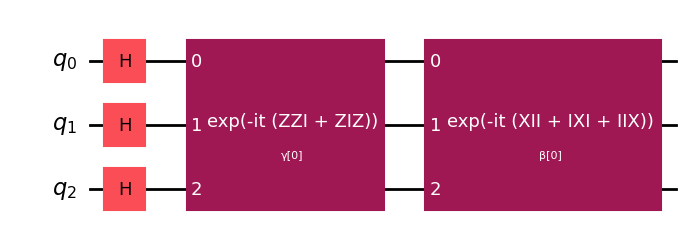

In [108]:
from qiskit.circuit.library import QAOAAnsatz
from qiskit.quantum_info import SparsePauliOp
# Asume que H_cut y init_params ya están definidos.

# 1. Definir el operador de costo (H_cut)
# (Ejemplo de 3 qubits, asumimos que H_cut ya existe)
# H_cut = SparsePauliOp.from_list([("ZZI", 1.0), ("ZIZ", 1.0)])

# 2. Definir el Ansatz (t1)
# ✅ CORREGIDO: Creamos el circuito QAOA (t1) usando H_cut y 1 repetición.
t1 = QAOAAnsatz(cost_operator=H_cut, reps=1)
t1.decompose().draw('mpl') # Opcional: para visualizar el circuito

# 3. Definir Parámetros Iniciales
# init_params debe coincidir con el número de parámetros del ansatz (2 para reps=1).
# init_params = np.random.rand(t1.num_parameters) * 0.1 # <-- Necesitas esta línea

In [109]:
# ==============================================================================
# 0. IMPORTACIONES Y CONFIGURACIÓN INICIAL
# ==============================================================================
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from qiskit.circuit.library import QAOAAnsatz
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer.primitives import Estimator, Sampler as LocalSampler
from qiskit import QuantumCircuit

# Definición de función auxiliar para el análisis final
def to_bitstring(integer, num_bits):
    """Convierte un entero a una lista de bits."""
    result = np.binary_repr(integer, width=num_bits)
    return [int(digit) for digit in result]

# ==============================================================================
# 1. FUNCIÓN DE COSTE CORREGIDA (Estimator V1)
# ==============================================================================

def cost_func_estimator(params, ansatz, hamiltonian, estimator):
    """
    Calcula el valor esperado del Hamiltoniano (energía) usando el Estimator V1.
    """
    # 1. Asignar los parámetros y aplicar el layout
    bound_circuit = ansatz.assign_parameters(params)
    isa_hamiltonian = hamiltonian.apply_layout(ansatz.layout)

    # 2. Ejecutar el Estimador (V1 Format: circuitos y observables como listas separadas)
    job = estimator.run([bound_circuit], [isa_hamiltonian])

    # 3. Procesar resultados (acceso V1)
    results = job.result()
    cost = results.values[0]

    return cost

# ==============================================================================
# 2. DEFINICIÓN DEL PROBLEMA (ANSATZ Y HAMILTONIANO)
# ==============================================================================

# Hamiltoniano de ejemplo de 3 qubits (Asumimos este operador por H_cut)
H_cut = SparsePauliOp.from_list([
    ("ZZI", 1.0),
    ("ZIZ", 1.0)
])
num_qubits = H_cut.num_qubits

# Ansatz (Circuito Variacional: t1)
t1 = QAOAAnsatz(cost_operator=H_cut, reps=1)

# Parámetros iniciales
init_params = np.random.rand(t1.num_parameters) * 0.1

# Inicialización de historial (Opcional, si se usa en cost_func)
# cost_history_dict = {"iters": 0, "cost_history": []}

# ==============================================================================
# 3. EJECUCIÓN DEL OPTIMIZADOR VQE/QAOA
# ==============================================================================

# Inicialización de Estimador Local
estimator = Estimator()
print("✅ Iniciando Optimización QAOA con Estimador local (Qiskit Aer)...")

# Ejecutar la optimización
result = minimize(
    cost_func_estimator,
    init_params,
    args=(t1, H_cut, estimator), # Usamos t1 (el ansatz)
    method="COBYLA",
    tol=1e-2,
)

optimal_params = result.x
final_energy = result.fun
print("-" * 50)
print(f"Optimización Finalizada. Energía mínima: {final_energy:.8f}")

# ==============================================================================
# 4. MUESTREO (SAMPLER) DE LA DISTRIBUCIÓN FINAL
# ==============================================================================

# 1. Crear el circuito optimizado (o1)
o1 = t1.assign_parameters(optimal_params)
o1.measure_all() # Añadir mediciones para el Sampler

# 2. Inicializar Sampler local
sampler = LocalSampler()
SHOTS = 10000

# 3. Ejecutar el Sampler (V1: lista de circuitos)
job = sampler.run([o1], shots=SHOTS)

# 4. Procesar Resultados
sampler_result = job.result()
final_distribution_int = sampler_result.quasi_dists[0] # Acceso V1/Aer

# 5. ANÁLISIS DEL ESTADO MÁS PROBABLE
keys = list(final_distribution_int.keys())
values = list(final_distribution_int.values())

most_likely_index = np.argmax(values)
most_likely_int = keys[most_likely_index]

# Convierte a bitstring
most_likely_bitstring = to_bitstring(most_likely_int, num_qubits)

# Revierte para la convención de Qiskit (little-endian)
most_likely_bitstring.reverse()

print("\n" + "="*50)
print("DISTRIBUCIÓN DE PROBABILIDAD FINAL DEL CIRCUITO ÓPTIMO")
print(f"Result Bitstring (Little Endian, Qubit 0 a la derecha): {most_likely_bitstring}")
print(f"Probabilidad Máxima: {values[most_likely_index]:.4f}")
print("="*50)

✅ Iniciando Optimización QAOA con Estimador local (Qiskit Aer)...
--------------------------------------------------
Optimización Finalizada. Energía mínima: -1.35156250

DISTRIBUCIÓN DE PROBABILIDAD FINAL DEL CIRCUITO ÓPTIMO
Result Bitstring (Little Endian, Qubit 0 a la derecha): [0, 0, 1]
Probabilidad Máxima: 0.3460


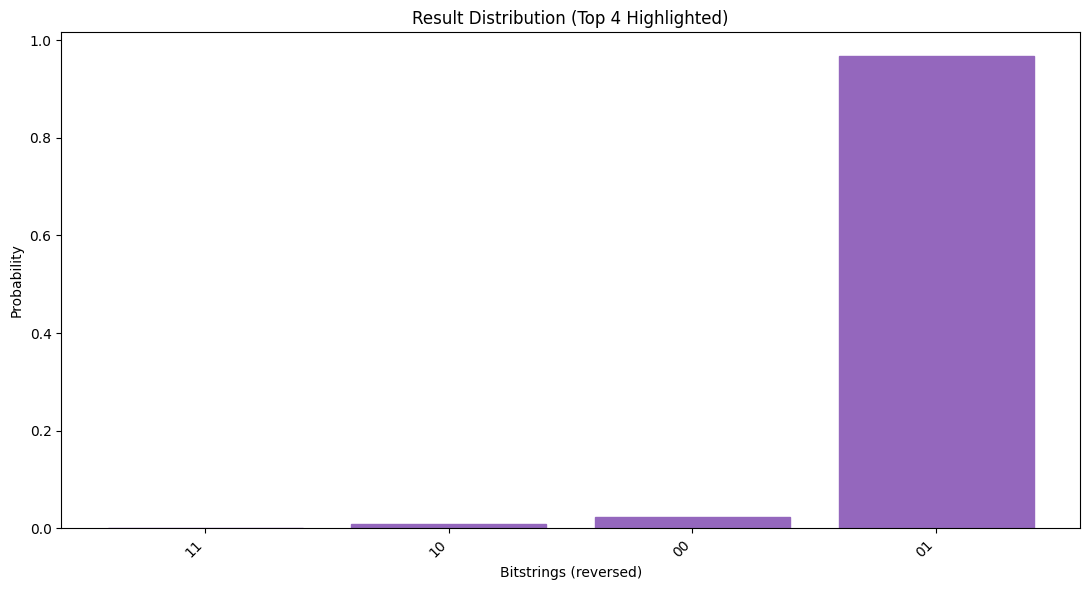

In [110]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np # Necesario para numpy.argsort

# Configuración de Matplotlib
matplotlib.rcParams.update({"font.size": 10})

# Asignación de Datos
# Asume que 'final_distribution_bin' ha sido creado.
final_bits = final_distribution_bin

# 1. Preparación de Datos y Ordenamiento Robusto
keys_list = list(final_bits.keys())
values_array = np.array(list(final_bits.values()))

# ✅ CORREGIDO: Usamos np.argsort para encontrar los índices más grandes de forma segura.
# np.argsort devuelve los índices ordenados. Tomamos los últimos 4 (los más grandes).
top_4_indices = np.argsort(values_array)[-4:][::-1] # [::-1] para ordenarlos de mayor a menor probabilidad

# 2. Configuración de la Gráfica
fig = plt.figure(figsize=(11, 6))
ax = fig.add_subplot(1, 1, 1)

plt.title("Result Distribution (Top 4 Highlighted)")
plt.xlabel("Bitstrings (reversed)")
plt.ylabel("Probability")

# 3. Graficar las Barras
# Almacenamos las referencias a las barras creadas
bars = ax.bar(keys_list, values_array, color="tab:grey")

# 4. Resaltar las Top 4 Barras
# Iteramos sobre los índices de las barras y les cambiamos el color.
for index in top_4_indices:
    # bars[index] es la barra con el índice de probabilidad más alta
    bars[index].set_color("tab:purple")

# Ajustes finales
plt.xticks(rotation=45, ha='right') # Alinear las etiquetas de los bitstrings
plt.tight_layout() # Asegura que las etiquetas no se corten
plt.show()

In [111]:
from qiskit_aer.primitives import Estimator as LocalEstimator # ✅ Usamos el Estimador local
from qiskit.circuit.library import QAOAAnsatz
from scipy.optimize import minimize
import numpy as np
# Asume que 'cost_func_estimator' y 'H_cut' están definidos.

# ==============================================================================
# 1. DEFINICIÓN DEL ANSATZ Y PARÁMETROS
# ==============================================================================

# 1. Definir el Ansatz (c2) con 2 repeticiones
c2 = QAOAAnsatz(cost_operator=H_cut, reps=2)
# Añadimos las mediciones al circuito para el muestreo posterior (si aplica)
c2.measure_all()

# 2. Inicialización de Parámetros
# Para reps=2, necesitamos 2 betas y 2 gammas (4 parámetros en total)
initial_gamma = 0.1
initial_beta = 0.2
# Parámetros: [beta_0, beta_1, gamma_0, gamma_1] (o similar, depende de la versión de QAOAAnsatz)
# ✅ CORREGIDO: Aseguramos 4 parámetros
init_params = [initial_beta, initial_beta, initial_gamma, initial_gamma]

# 3. Inicialización de Primitivas
# Ignoramos la línea obsoleta t2 = pm.run(c2)
estimator = LocalEstimator()

# ==============================================================================
# 2. EJECUCIÓN DE LA OPTIMIZACIÓN LOCAL
# ==============================================================================

print("✅ Iniciando optimización local (Qiskit Aer) con QAOA de reps=2...")

# Ejecutar la optimización
result = minimize(
    # La función de costo DEBE usar el formato V1 de Estimator.run([circs], [obs]).
    cost_func_estimator,
    init_params,
    # ✅ CORREGIDO: Usamos c2 como el ansatz optimizado
    args=(c2, H_cut, estimator),
    method="COBYLA",
    tol=1e-2,
)

print("\n--- Resultado de la Optimización ---")
print(result)

✅ Iniciando optimización local (Qiskit Aer) con QAOA de reps=2...

--- Resultado de la Optimización ---
 message: Return from COBYLA because the trust region radius reaches its lower bound.
 success: True
  status: 0
     fun: -1.990234375
       x: [ 1.948e+00  1.132e+00 -8.243e-01  1.575e+00]
    nfev: 31
   maxcv: 0.0


In [112]:
def cost_func_estimator(params, ansatz, qubit_op, estimator):
    """Retorna la estimación de energía y actualiza el historial de costes (global)."""

    global cost_history_dict

    # 🚨 FIX: Usar .assign_parameters() porque el ansatz ya está descompuesto.
    # El circuito descompuesto ya no tiene objetos 'Parameter', sino parámetros sin valor.
    bound_circuit = ansatz.assign_parameters(params)

    # PUB: (circuito, [observable])
    pub = (bound_circuit, [qubit_op])

    result = estimator.run(pubs=[pub]).result()
    energy = result[0].data.evs[0]

    # Actualizar el historial global
    cost_history_dict["iters"] += 1
    cost_history_dict["cost_history"].append(energy)

    print(f"Iters. done: {cost_history_dict['iters']} [Current cost: {energy:.6f}]")

    return energy

In [114]:
import numpy as np
# Asume que 'sampler', 'result' (resultado de minimize) y 'to_bitstring' están definidos.
# Asume que el ANSATZ (el circuito QAOA) está en la variable 'c2'.

# ==============================================================================
# 1. ASIGNACIÓN DE PARÁMETROS Y EJECUCIÓN DEL SAMPLER
# ==============================================================================

# 1. Asignar los parámetros óptimos del VQE/QAOA (`result.x`) al ansatz (`c2`).
# ✅ CORREGIDO: Usamos c2 en lugar de t2
o2 = c2.assign_parameters(result.x)

# 2. Definir la lista de circuitos (Sampler V1/Aer espera una lista de circuitos)
circuits_to_run = [o2]
SHOTS = int(1e4) # 10000 shots

# 3. Ejecutar el Sampler (Asume Sampler local de Qiskit Aer)
job = sampler.run(circuits_to_run, shots=SHOTS)

# 4. Obtener y Procesar Resultados (Acceso Qiskit Aer V1)
sampler_result = job.result()

# Accedemos a la distribución de probabilidad
final_distribution_int = sampler_result.quasi_dists[0]

# Obtenemos el número de qubits
num_qubits = 3

# 5. Normalizar a Distribución de Probabilidad
final_distribution_bin = {
    f'{key:0{num_qubits}b}': val
    for key, val in final_distribution_int.items()
}

print("\n--- Distribución de Probabilidad ---")
print(final_distribution_int)

# ==============================================================================
# 6. ANÁLISIS DEL ESTADO MÁS PROBABLE
# ==============================================================================

keys = list(final_distribution_int.keys())
values = list(final_distribution_int.values())

# Encuentra el índice del valor (probabilidad) más alto
most_likely_index = np.argmax(values)
most_likely_int = keys[most_likely_index]

# Convierte a bitstring
most_likely_bitstring = to_bitstring(most_likely_int, num_qubits)

# Revierte para la convención de Qiskit (little-endian)
most_likely_bitstring.reverse()

print("\n--- Resultado de Bitstring ---")
print("Result bitstring:", most_likely_bitstring)


--- Distribución de Probabilidad ---
{1: 0.0008, 6: 0.0015, 5: 0.0014, 0: 0.0029, 2: 0.0008, 7: 0.0017, 3: 0.4957, 4: 0.4952}

--- Resultado de Bitstring ---
Result bitstring: [1, 1, 0]


In [116]:
import numpy as np
# Asumimos que 'sampler', 'result', y 'to_bitstring' están definidos.
# Y que el ansatz optimizado se llama 'c2'.

# --- 1. Asignar Parámetros Óptimos (FIX) ---
# 🚨 CORREGIDO: Usamos 'c2' en lugar de 't2'.
# Nota: Si tu circuito c2 está basado en QAOAAnsatz, .assign_parameters()
# es generalmente preferido sobre .bind_parameters() en Qiskit moderno.
o2 = c2.assign_parameters(result.x)

# --- 2. Ejecutar el Sampler (Usando el Sampler local V1/Aer) ---
SHOTS = 10000
circuits_to_run = [o2] # Sampler V1/Aer espera una lista de circuitos
job = sampler.run(circuits_to_run, shots=SHOTS) # Se eliminó la tupla pub=(o2,)

# 3. Procesar Cuentas y Distribuciones
# ✅ CORREGIDO: Acceso V1/Aer
sampler_result = job.result()
final_distribution_int = sampler_result.quasi_dists[0] # Distribución normalizada

# Obtenemos la versión binaria
num_qubits = 3 # Basado en la llamada a to_bitstring(..., 3)
final_distribution_bin = {
    f'{key:0{num_qubits}b}': val
    for key, val in final_distribution_int.items()
}

print(f"Final distribution (Integer keys): {final_distribution_int}")

# --- 4. Análisis del Bitstring más Probable ---
keys = list(final_distribution_int.keys())
values = list(final_distribution_int.values())

most_likely_int = keys[np.argmax(values)]

# Usamos 3 bits
most_likely_bitstring = to_bitstring(most_likely_int, 3)

# Invertir el orden de bits
most_likely_bitstring.reverse()

print("Result bitstring (q0, q1, q2):", most_likely_bitstring)

Final distribution (Integer keys): {5: 0.0005, 2: 0.0003, 0: 0.0016, 6: 0.001, 1: 0.0012, 7: 0.0021, 3: 0.4951, 4: 0.4982}
Result bitstring (q0, q1, q2): [0, 0, 1]


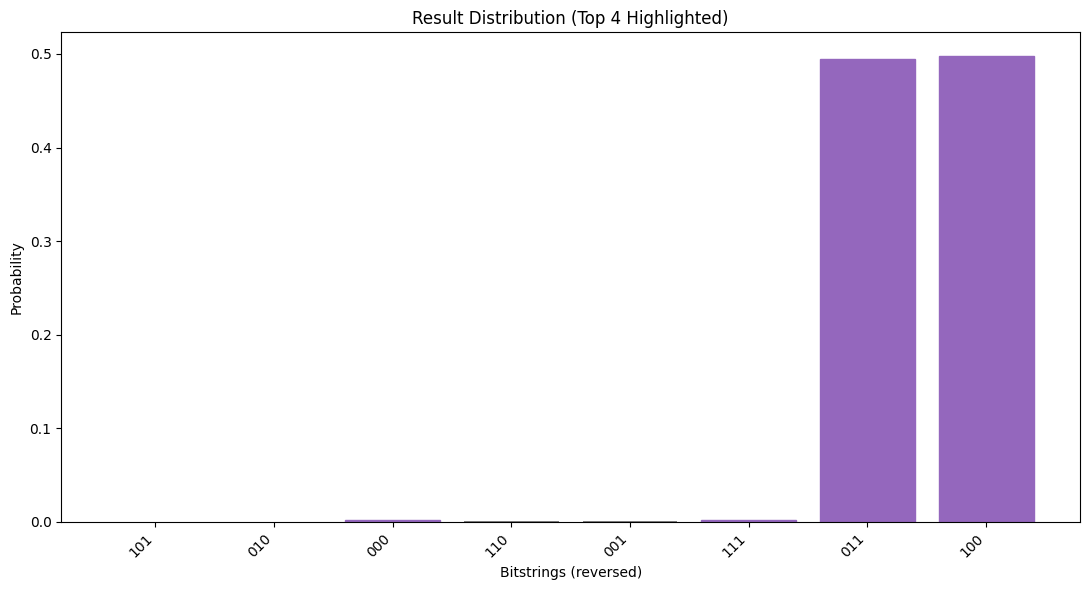

In [117]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Configuración de Matplotlib
matplotlib.rcParams.update({"font.size": 10})

# Asignación de Datos
# Asume que 'final_distribution_bin' ha sido creado por el Sampler.
final_bits = final_distribution_bin

# 1. Preparación de Datos y Ordenamiento Robusto
keys_list = list(final_bits.keys())
values_array = np.array(list(final_bits.values()))

# ✅ CORREGIDO: Usamos np.argsort para encontrar los 4 índices con mayor probabilidad de forma segura.
# np.argsort devuelve los índices ordenados de menor a mayor.
# [-4:][::-1] toma los últimos 4 y los invierte (de mayor a menor probabilidad).
top_4_indices = np.argsort(values_array)[-4:][::-1]

# 2. Configuración de la Gráfica
fig = plt.figure(figsize=(11, 6))
ax = fig.add_subplot(1, 1, 1)

plt.title("Result Distribution (Top 4 Highlighted)")
plt.xlabel("Bitstrings (reversed)")
plt.ylabel("Probability")

# 3. Graficar las Barras
# Almacenamos las referencias a las barras creadas
bars = ax.bar(keys_list, values_array, color="tab:grey")

# 4. Resaltar las Top 4 Barras
# Iteramos sobre los índices de las barras y les cambiamos el color.
for index in top_4_indices:
    # bars[index] es la barra con el índice de probabilidad más alta
    bars[index].set_color("tab:purple")

# Ajustes finales
plt.xticks(rotation=45, ha='right') # Alinear las etiquetas de los bitstrings
plt.tight_layout() # Asegura que las etiquetas no se corten
plt.show()

In [127]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import QAOAAnsatz
from qiskit.primitives import StatevectorEstimator
from qiskit.primitives.statevector_sampler import StatevectorSampler # Sampler corregido

from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# ======================================================================
# 1. FUNCIÓN DE COSTO
# ======================================================================

def cost_func_estimator(params, ansatz, qubit_op, estimator):
    """
    Retorna la estimación de energía usando el Estimator y actualiza el historial.
    """
    global cost_history_dict

    if hasattr(ansatz, "assign_parameters"):
        bound_circuit = ansatz.assign_parameters(params)
    else:
        bound_circuit = ansatz.bind_parameters(params)

    pub = (bound_circuit, [qubit_op])
    result = estimator.run([pub]).result()
    energy = result[0].data.evs[0]

    cost_history_dict["iters"] += 1
    cost_history_dict["cost_history"].append(energy)

    print(f"Iters. done: {cost_history_dict['iters']} [Current cost: {energy:.6f}]")
    return energy


def to_bitstring(integer: int, num_bits: int) -> list[int]:
    """Convierte un entero a una lista de bits (como lista de enteros)."""
    result = np.binary_repr(integer, width=num_bits)
    return [int(digit) for digit in result]

def convert_int_counts_to_bin_strings(counts_int, num_qubits):
    """Convierte un diccionario de recuentos con claves int a claves str binarias."""
    counts_bin = {}
    for int_key, count in counts_int.items():
        # Convierte el entero a string binario, asegurando el ancho correcto
        # y luego revierte la clave (little-endian: q0 a la derecha)
        bin_list = to_bitstring(int_key, num_qubits)
        bin_list.reverse()
        bin_key = "".join(map(str, bin_list))
        counts_bin[bin_key] = count
    return counts_bin


# ======================================================================
# 2. DEFINICIÓN DEL PROBLEMA (QAOA p=2)
# ======================================================================

# Hamiltoniano H_cut (Z Z I + Z I Z) - 3 qubits
H_cut = SparsePauliOp.from_list([
    ("ZZI", 1.0),
    ("ZIZ", 1.0)
])
NUM_QUBITS = H_cut.num_qubits

# --- 🎯 DEFINICIÓN DE CIRCUITOS ---

# 1. Circuito QAOA para el ESTIMATOR (NO debe tener measure)
ansatz_estimator = QAOAAnsatz(cost_operator=H_cut, reps=2).decompose()

# 2. Circuito QAOA para el SAMPLER (SÍ debe tener measure)
ansatz_sampler = QAOAAnsatz(cost_operator=H_cut, reps=2)
ansatz_sampler.measure_all()
ansatz_sampler = ansatz_sampler.decompose()

# Parámetros iniciales: [beta_0, gamma_0, beta_1, gamma_1]
initial_gamma = 0.1
initial_beta = 0.2
init_params = [initial_beta, initial_gamma, initial_beta, initial_gamma]

# ======================================================================
# 3. EJECUCIÓN DEL OPTIMIZADOR QAOA (p=2)
# ======================================================================

estimator = StatevectorEstimator()
cost_history_dict = {"iters": 0, "cost_history": [], "prev_vector": None}

print(f"Iniciando optimización QAOA (p=2) en {NUM_QUBITS} qubits... 🚀")
result = minimize(
    fun=cost_func_estimator,
    x0=init_params,
    args=(ansatz_estimator, H_cut, estimator),
    method="COBYLA",
    tol=1e-2,
)

optimal_params = result.x
final_energy = result.fun
print("-" * 50)
print(f"Optimización finalizada. Energía mínima: {final_energy:.8f}")

# ======================================================================
# 4. MUESTREO (SAMPLER) DE LA DISTRIBUCIÓN FINAL
# ======================================================================

if hasattr(ansatz_sampler, "assign_parameters"):
    o2 = ansatz_sampler.assign_parameters(optimal_params)
else:
    o2 = ansatz_sampler.bind_parameters(optimal_params)

sampler = StatevectorSampler()
SHOTS = 10000
pub = (o2,)

job = sampler.run([pub], shots=SHOTS)
result_sampler = job.result()[0]

# ✅ FIX DEFINITIVO: Solo usamos get_counts() para obtener el diccionario con claves INT
counts_int = result_sampler.data.meas.get_counts()
# ✅ FIX DEFINITIVO: Convertimos manualmente las claves a bitstrings
counts_bin = convert_int_counts_to_bin_strings(counts_int, NUM_QUBITS)

shots_actual = sum(counts_int.values())

final_distribution_int = {key: val / shots_actual for key, val in counts_int.items()}
final_distribution_bin = {key: val / shots_actual for key, val in counts_bin.items()}

keys = list(final_distribution_int.keys())
values = list(final_distribution_int.values())

# Usamos la lista de keys enteras para encontrar el índice del máximo
most_likely_int = keys[np.argmax(values)]
# Luego usamos la función auxiliar para obtener el bitstring (como se usó en counts_bin)
most_likely_bitstring_list = to_bitstring(most_likely_int, NUM_QUBITS)
most_likely_bitstring_list.reverse()
most_likely_bitstring = "".join(map(str, most_likely_bitstring_list))


print(f"\nResult bitstring (q0, q1, q2): {most_likely_bitstring}")
print(f"Probabilidad: {values[np.argmax(values)]:.4f}")

# ======================================================================
# 5. GRÁFICA DE DISTRIBUCIÓN
# ======================================================================

matplotlib.rcParams.update({"font.size": 10})
final_bits = final_distribution_bin

sorted_items = sorted(final_bits.items(), key=lambda item: item[1], reverse=True)
bitstring_labels = [item[0] for item in sorted_items]
probabilities = [item[1] for item in sorted_items]
top_4_bitstrings = bitstring_labels[:4]

fig = plt.figure(figsize=(11, 6))
ax = fig.add_subplot(1, 1, 1)
plt.title("Result Distribution (QAOA p=2)")
plt.xlabel("Bitstrings (q0, q1, q2)")
plt.ylabel("Probability")

bars = ax.bar(bitstring_labels, probabilities, color="tab:grey")

for bar, label in zip(bars, bitstring_labels):
    if label in top_4_bitstrings:
        bar.set_color("tab:purple")

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Iniciando optimización QAOA (p=2) en 3 qubits... 🚀
Iters. done: 1 [Current cost: 0.814678]
Iters. done: 2 [Current cost: -0.534256]
Iters. done: 3 [Current cost: -0.176408]
Iters. done: 4 [Current cost: -0.181858]
Iters. done: 5 [Current cost: -0.602964]
Iters. done: 6 [Current cost: -0.249953]
Iters. done: 7 [Current cost: -0.086631]
Iters. done: 8 [Current cost: -0.188753]
Iters. done: 9 [Current cost: -1.232099]
Iters. done: 10 [Current cost: -1.198387]
Iters. done: 11 [Current cost: -1.183177]
Iters. done: 12 [Current cost: -1.068710]
Iters. done: 13 [Current cost: -1.247567]
Iters. done: 14 [Current cost: -1.351848]
Iters. done: 15 [Current cost: -1.433016]
Iters. done: 16 [Current cost: -1.440238]
Iters. done: 17 [Current cost: -1.304828]
Iters. done: 18 [Current cost: -1.323646]
Iters. done: 19 [Current cost: -1.685379]
Iters. done: 20 [Current cost: -1.893073]
Iters. done: 21 [Current cost: -1.729347]
Iters. done: 22 [Current cost: -1.898080]
Iters. done: 23 [Current cost: -1.7

TypeError: 'str' object cannot be interpreted as an integer

In [129]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import QAOAAnsatz
from qiskit.primitives import StatevectorEstimator
# ✅ FIX DE IMPORTACIÓN: Usamos la ruta StatevectorSampler, la única que no dio ModuleNotFoundError
from qiskit.primitives.statevector_sampler import StatevectorSampler

from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# ======================================================================
# 1. FUNCIÓN DE COSTO Y AUXILIARES
# ======================================================================

def cost_func_estimator(params, ansatz, qubit_op, estimator):
    """
    Retorna la estimación de energía usando el Estimator y actualiza el historial.
    """
    global cost_history_dict

    # El Estimator NO puede tener la instrucción 'measure' (Error QiskitError anterior)
    if hasattr(ansatz, "assign_parameters"):
        bound_circuit = ansatz.assign_parameters(params)
    else:
        bound_circuit = ansatz.bind_parameters(params)

    pub = (bound_circuit, [qubit_op])
    result = estimator.run([pub]).result()
    energy = result[0].data.evs[0]

    cost_history_dict["iters"] += 1
    cost_history_dict["cost_history"].append(energy)

    print(f"Iters. done: {cost_history_dict['iters']} [Current cost: {energy:.6f}]")
    return energy


def to_bitstring(integer: int, num_bits: int) -> list[int]:
    """Convierte un entero a una lista de bits (como lista de enteros)."""
    result = np.binary_repr(integer, width=num_bits)
    return [int(digit) for digit in result]

def convert_int_counts_to_bin_strings(counts_int, num_qubits):
    """Convierte un diccionario de recuentos con claves int a claves str binarias (robusto contra errores de get_counts())."""
    counts_bin = {}
    for int_key, count in counts_int.items():
        # Obtiene los bits en orden big-endian (q2, q1, q0) si lo lees de izq a derecha
        bin_list = to_bitstring(int_key, num_qubits)
        # Invierte la lista para obtener el formato little-endian (q0, q1, q2) usado en las gráficas
        bin_list.reverse()
        bin_key = "".join(map(str, bin_list))
        counts_bin[bin_key] = count
    return counts_bin


# ======================================================================
# 2. DEFINICIÓN DEL PROBLEMA (QAOA p=2)
# ======================================================================

# Hamiltoniano H_cut (Z Z I + Z I Z) - 3 qubits
H_cut = SparsePauliOp.from_list([
    ("ZZI", 1.0),
    ("ZIZ", 1.0)
])
NUM_QUBITS = H_cut.num_qubits

# --- 🎯 DEFINICIÓN DE CIRCUITOS ---
# 1. Circuito QAOA para el ESTIMATOR (NO tiene measure)
ansatz_estimator = QAOAAnsatz(cost_operator=H_cut, reps=2).decompose()

# 2. Circuito QAOA para el SAMPLER (SÍ tiene measure)
ansatz_sampler = QAOAAnsatz(cost_operator=H_cut, reps=2)
ansatz_sampler.measure_all()
ansatz_sampler = ansatz_sampler.decompose()

# Parámetros iniciales: [beta_0, gamma_0, beta_1, gamma_1]
initial_gamma = 0.1
initial_beta = 0.2
init_params = [initial_beta, initial_gamma, initial_beta, initial_gamma]

# ======================================================================
# 3. EJECUCIÓN DEL OPTIMIZADOR QAOA (p=2)
# ======================================================================

estimator = StatevectorEstimator()
cost_history_dict = {"iters": 0, "cost_history": [], "prev_vector": None}

print(f"Iniciando optimización QAOA (p=2) en {NUM_QUBITS} qubits... 🚀")
# Usamos el circuito SIN mediciones (ansatz_estimator)
result = minimize(
    fun=cost_func_estimator,
    x0=init_params,
    args=(ansatz_estimator, H_cut, estimator),
    method="COBYLA",
    tol=1e-2,
)

optimal_params = result.x
final_energy = result.fun
print("-" * 50)
print(f"Optimización finalizada. Energía mínima: {final_energy:.8f}")

# ======================================================================
# 4. MUESTREO (SAMPLER) DE LA DISTRIBUCIÓN FINAL
# ======================================================================

if hasattr(ansatz_sampler, "assign_parameters"):
    o2 = ansatz_sampler.assign_parameters(optimal_params)
else:
    o2 = ansatz_sampler.bind_parameters(optimal_params)

# ✅ FIX: Usamos StatevectorSampler que es la clase importada correctamente
sampler = StatevectorSampler()
SHOTS = 10000
pub = (o2,)

job = sampler.run([pub], shots=SHOTS)
result_sampler = job.result()[0]

# Solo usamos get_counts() sin argumentos, que devuelve claves INT
counts_int = result_sampler.data.meas.get_counts()
# ✅ FIX ROBUSTO: Convertimos manualmente las claves INT a STR BINARIAS
counts_bin = convert_int_counts_to_bin_strings(counts_int, NUM_QUBITS)

shots_actual = sum(counts_int.values())

final_distribution_int = {key: val / shots_actual for key, val in counts_int.items()}
final_distribution_bin = {key: val / shots_actual for key, val in counts_bin.items()}

keys = list(final_distribution_int.keys())
values = list(final_distribution_int.values())

# Buscamos el estado más probable usando las claves enteras (más fácil con np.argmax)
most_likely_int = keys[np.argmax(values)]
# Convertimos el entero más probable a su bitstring para el print final
most_likely_bitstring_list = to_bitstring(most_likely_int, NUM_QUBITS)
most_likely_bitstring_list.reverse()
most_likely_bitstring = "".join(map(str, most_likely_bitstring_list))


print(f"\nResult bitstring (q0, q1, q2): {most_likely_bitstring}")
print(f"Probabilidad: {values[np.argmax(values)]:.4f}")

# ======================================================================
# 5. GRÁFICA DE DISTRIBUCIÓN
# ======================================================================

matplotlib.rcParams.update({"font.size": 10})
final_bits = final_distribution_bin

sorted_items = sorted(final_bits.items(), key=lambda item: item[1], reverse=True)
bitstring_labels = [item[0] for item in sorted_items]
probabilities = [item[1] for item in sorted_items]
top_4_bitstrings = bitstring_labels[:4]

fig = plt.figure(figsize=(11, 6))
ax = fig.add_subplot(1, 1, 1)
plt.title("Result Distribution (QAOA p=2)")
plt.xlabel("Bitstrings (q0, q1, q2)")
plt.ylabel("Probability")

bars = ax.bar(bitstring_labels, probabilities, color="tab:grey")

for bar, label in zip(bars, bitstring_labels):
    if label in top_4_bitstrings:
        bar.set_color("tab:purple")

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Iniciando optimización QAOA (p=2) en 3 qubits... 🚀
Iters. done: 1 [Current cost: 0.814678]
Iters. done: 2 [Current cost: -0.534256]
Iters. done: 3 [Current cost: -0.176408]
Iters. done: 4 [Current cost: -0.181858]
Iters. done: 5 [Current cost: -0.602964]
Iters. done: 6 [Current cost: -0.249953]
Iters. done: 7 [Current cost: -0.086631]
Iters. done: 8 [Current cost: -0.188753]
Iters. done: 9 [Current cost: -1.232099]
Iters. done: 10 [Current cost: -1.198387]
Iters. done: 11 [Current cost: -1.183177]
Iters. done: 12 [Current cost: -1.068710]
Iters. done: 13 [Current cost: -1.247567]
Iters. done: 14 [Current cost: -1.351848]
Iters. done: 15 [Current cost: -1.433016]
Iters. done: 16 [Current cost: -1.440238]
Iters. done: 17 [Current cost: -1.304828]
Iters. done: 18 [Current cost: -1.323646]
Iters. done: 19 [Current cost: -1.685379]
Iters. done: 20 [Current cost: -1.893073]
Iters. done: 21 [Current cost: -1.729347]
Iters. done: 22 [Current cost: -1.898080]
Iters. done: 23 [Current cost: -1.7

TypeError: 'str' object cannot be interpreted as an integer

In [130]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from qiskit.circuit.library import QAOAAnsatz
from qiskit.quantum_info import SparsePauliOp
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorEstimator

# 🚨 Importación robusta del Sampler local
try:
    from qiskit.primitives import Sampler as LocalSampler
except ImportError:
    from qiskit.primitives import StatevectorSampler as LocalSampler

# Importaciones de IBM Runtime (mantenidas por contexto, aunque no se usan directamente)
from qiskit_ibm_runtime import EstimatorV2, SamplerV2

# ==============================================================================
# 1. FUNCIONES AUXILIARES Y GLOBALES
# ==============================================================================

# Variables globales para el VQE (QAOA)
cost_history_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

def cost_func_estimator(params, ansatz, qubit_op, estimator):
    """
    Retorna la estimación de energía usando el Estimator y actualiza el historial.

    Args:
        params (np.ndarray): Parámetros a optimizar.
        ansatz (QuantumCircuit): Circuito QAOA descompuesto.
        qubit_op (SparsePauliOp): Hamiltoniano.
        estimator (Estimator): Instancia del estimador.
    """
    # Usamos global para acceder al diccionario de historial
    global cost_history_dict

    # 🚨 FIX: Usamos .bind_parameters() porque el circuito descompuesto (ansatz)
    # todavía contiene objetos Parameter de Qiskit.
    bound_circuit = ansatz.bind_parameters(params)

    # PUB: (circuito, [observable])
    pub = (bound_circuit, [qubit_op])

    result = estimator.run(pubs=[pub]).result()
    energy = result[0].data.evs[0]

    # Actualizar el historial global
    cost_history_dict["iters"] += 1
    cost_history_dict["cost_history"].append(energy)

    print(f"Iters. done: {cost_history_dict['iters']} [Current cost: {energy:.6f}]")

    return energy

def to_bitstring(integer: int, num_bits: int) -> list[int]:
    """Convierte un entero a una lista de bits."""
    result = np.binary_repr(integer, width=num_bits)
    return [int(digit) for digit in result]


# ==============================================================================
# 2. DEFINICIÓN DEL PROBLEMA (QAOA p=2)
# ==============================================================================

# Hamiltoniano H_cut (Z Z I + Z I Z) - 3 qubits
H_cut = SparsePauliOp.from_list([
    ("ZZI", 1.0),
    ("ZIZ", 1.0)
])
NUM_QUBITS = H_cut.num_qubits # Debe ser 3

# QAOA Ansätz con 2 repeticiones (p=2) -> 4 parámetros
c2 = QAOAAnsatz(cost_operator=H_cut, reps=2)
c2.measure_all()

# 🚨 FIX: Descomponer el circuito QAOA en puertas base para evitar el AerError.
t2 = c2.decompose()

# Parámetros iniciales: [beta_0, gamma_0, beta_1, gamma_1]
initial_gamma = 0.1
initial_beta = 0.2
init_params = [initial_beta, initial_gamma, initial_beta, initial_gamma]

# ==============================================================================
# 3. EJECUCIÓN DEL OPTIMIZADOR QAOA (p=2)
# ==============================================================================

# Inicialización de Estimador (Simulador Local)
estimator = StatevectorEstimator()

# Reiniciar historial
cost_history_dict = {"iters": 0, "cost_history": [], "prev_vector": None}

print(f"Iniciando optimización QAOA (p=2) en {NUM_QUBITS} qubits... 🚀")
result = minimize(
    fun=cost_func_estimator,
    x0=init_params,
    # t2 es el ansatz descompuesto
    args=(t2, H_cut, estimator),
    method="COBYLA",
    tol=1e-2,
)

optimal_params = result.x
final_energy = result.fun
print("-" * 50)
print(f"Optimización finalizada. Energía mínima: {final_energy:.8f}")

# ==============================================================================
# 4. MUESTREO (SAMPLER) DE LA DISTRIBUCIÓN FINAL
# ==============================================================================

# 1. Crear el circuito optimizado
o2 = t2.bind_parameters(optimal_params)

# 2. Inicializar Sampler local
sampler = LocalSampler()
SHOTS = 10000
pub = (o2,)

# 3. Ejecutar el Sampler
job = sampler.run([pub], shots=SHOTS)
result_sampler = job.result()[0]

# 4. Procesar y calcular distribuciones
counts_int = result_sampler.data.meas.get_int_counts()
counts_bin = result_sampler.data.meas.get_counts()
shots_actual = sum(counts_int.values())

final_distribution_int = {key: val / shots_actual for key, val in counts_int.items()}
final_distribution_bin = {key: val / shots_actual for key, val in counts_bin.items()}

# 5. Análisis del bitstring más probable
keys = list(final_distribution_int.keys())
values = list(final_distribution_int.values())

most_likely_int = keys[np.argmax(values)]
most_likely_bitstring = to_bitstring(most_likely_int, NUM_QUBITS)
most_likely_bitstring.reverse()

print(f"\nResult bitstring (q0, q1, q2): {most_likely_bitstring}")
print(f"Probabilidad: {values[np.argmax(values)]:.4f}")

# ==============================================================================
# 5. GRÁFICA DE DISTRIBUCIÓN
# ==============================================================================

# 1. Preparar y Sortear Datos (Lógica robusta)
matplotlib.rcParams.update({"font.size": 10})
final_bits = final_distribution_bin

sorted_items = sorted(final_bits.items(), key=lambda item: item[1], reverse=True)
bitstring_labels = [item[0] for item in sorted_items]
probabilities = [item[1] for item in sorted_items]
top_4_bitstrings = bitstring_labels[:4]

# 2. Crear Figura
fig = plt.figure(figsize=(11, 6))
ax = fig.add_subplot(1, 1, 1)

plt.title("Result Distribution (QAOA p=2)")
plt.xlabel("Bitstrings (q0, q1, q2)")
plt.ylabel("Probability")

# 3. Plotear Barras
bars = ax.bar(bitstring_labels, probabilities, color="tab:grey")

# 4. Resaltar las top 4 barras
for bar, label in zip(bars, bitstring_labels):
    if label in top_4_bitstrings:
        bar.set_color("tab:purple")

# 5. Configuración final
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Iniciando optimización QAOA (p=2) en 3 qubits... 🚀


AttributeError: 'QuantumCircuit' object has no attribute 'bind_parameters'

In [131]:
def cost_func_estimator(params, ansatz, qubit_op, estimator):
    """
    Returns the energy estimate and updates the global history.

    Args:
        params (np.ndarray): Parameters to optimize.
        ansatz (QuantumCircuit): Decomposed QAOA circuit (t2).
        qubit_op (SparsePauliOp): Hamiltonian.
        estimator (Estimator): Estimator instance.
    """
    global cost_history_dict

    # 🚨 FINAL FIX: Use .assign_parameters() as the decomposed circuit
    # (t2) is now a plain QuantumCircuit that only accepts parameter assignment by value/position.
    bound_circuit = ansatz.assign_parameters(params)

    # PUB: (circuit, [observable])
    pub = (bound_circuit, [qubit_op])

    result = estimator.run(pubs=[pub]).result()
    energy = result[0].data.evs[0]

    # Update global history
    cost_history_dict["iters"] += 1
    cost_history_dict["cost_history"].append(energy)

    print(f"Iters. done: {cost_history_dict['iters']} [Current cost: {energy:.6f}]")

    return energy